# <span style="color:red;"> Project Name - Cardiovascular Risk Prediction </span>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

##### Project Type   - Classification Algorithm 
##### Contribution   - Individual

![alt text](Heart.jpeg)

# <span style="color:red;"> Data Description </span>
Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [26]:
# libraries used in this project 

import pandas as pd # Pandas is a library used for data analysis and manipulation.
import numpy as np  # NumPy is a library for numerical computing with Python It provides powerful array and matrix operations linear algebra functions, random number generation, and other mathematical tools. 
import seaborn as sns # Seaborn is a library for data visualization built on top of Matplotlib. It provides a high-level interface for creating statistical graphics.
import plotly.express as px # Plotly is a library for creating interactive visualizations in Python. Plotly visualizations can be rendered in web browsers, making them ideal for sharing data insights with others.
import matplotlib.pyplot as plt #For Visualizations 
from sklearn.preprocessing import StandardScaler,MinMaxScaler #for Scaling feature data 
from sklearn.impute import KNNImputer,SimpleImputer #For Outlier Handling 

# Importing libraries for modelling and evaluation 

from sklearn.tree import DecisionTreeClassifier  # # Decision Tree Classifier for classification tasks
from sklearn.linear_model import LogisticRegression  # # Logistic Regression for binary classification
from sklearn.neighbors import KNeighborsClassifier  # # K-Nearest Neighbors for simple, instance-based learning
from sklearn.svm import SVC  # # Support Vector Classifier for high-dimensional classification
from xgboost import XGBClassifier  # # XGBoost Classifier for scalable and accurate gradient boosting
from sklearn.ensemble import RandomForestClassifier  # # Random Forest Classifier for ensemble learning and robustness
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score  # # Metrics for evaluating model performance

# Importing libraries for hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV  # # Randomized Search for hyperparameter optimization
from sklearn.model_selection import GridSearchCV  # # Grid Search for hyperparameter tuning
from sklearn.model_selection import train_test_split  # # Splitting data into training and test sets
from sklearn.feature_selection import mutual_info_classif  # # Feature selection using mutual information 
from imblearn.over_sampling import SMOTE  # # SMOTE for handling class imbalance via oversampling 
import warnings  # # Warnings to suppress unnecessary runtime warnings 
warnings.filterwarnings('ignore')  # # Ignore warnings for cleaner output

In [27]:
# Loading the dataset to the dataframe named "data_df"
data_df=pd.read_csv("data_cardiovascular_risk.csv")

## <span style ="color:red;"> Data Preprocessing </span>

In [3]:
data_df.head() #How does the data look like ? with the heading of the column names 

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
data_df=data_df.drop(columns=["id"]) #"id" feature has no reference in this analysis so dropping it from further analysis 

In [5]:
data_df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [6]:
#Checking the dataset info for total data, columns and datatypes 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


The dataset contains 7 categorical features namely 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp' & 'diabetes'.

The dataset contains 8 numerical features namely 'age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' & 'glucose'.

Here the target feature is 'TenYearCHD'

In [7]:
# Creating two variable for categorical and numerical feature for future analysis 
cat_features =["education","sex","is_smoking","BPMeds","prevalentStroke","prevalentHyp","diabetes"]
num_features =["age","totChol","cigsPerDay","sysBP","diaBP","BMI","heartRate","glucose"]

In [8]:
#Running describe function for numeric variable and using transpose for format 
data_df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5
BMI,3376.0,25.794964,4.115449,15.96,23.02,25.38,28.04,56.8
heartRate,3389.0,75.977279,11.971868,45.00,68.00,75.00,83.00,143.0
glucose,3086.0,82.086520,24.244753,40.00,71.00,78.00,87.00,394.0


## <span style = "color:red;"> Encoding Categorical Variable to numerical format </span>

In [9]:
#Label encoding categorical features for further analysis 
data_df["sex"]=np.where(data_df["sex"]=="M",1,0)
data_df["is_smoking"]=np.where(data_df["is_smoking"]=="YES",1,0)

## <span style ="color:red ;"> Null values handiling </span>

In [10]:
#checking for null value cound in the data
data_df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

For Null values handling :
simple imputer ("Most_frequent") for categorical features 
Knn imputer for numerical features 
These both are implemented seperately for both the features 

In [11]:
#implementig simple imputer on categorical features 
simp_imputer = SimpleImputer(strategy="most_frequent")
simp_imputer.fit(data_df[cat_features])
data_df[cat_features] = simp_imputer.transform(data_df[cat_features])


In [12]:
#implementing Knn imputer on numeric features
knn_imputer=KNNImputer(n_neighbors=5)
knn_imputer.fit(data_df[num_features])
data_df[num_features]=knn_imputer.transform(data_df[num_features])

## <span style ="color: red;"> Distribution and outliers analysis </span>

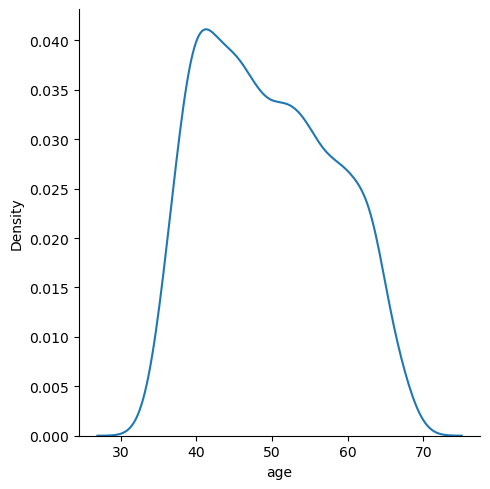

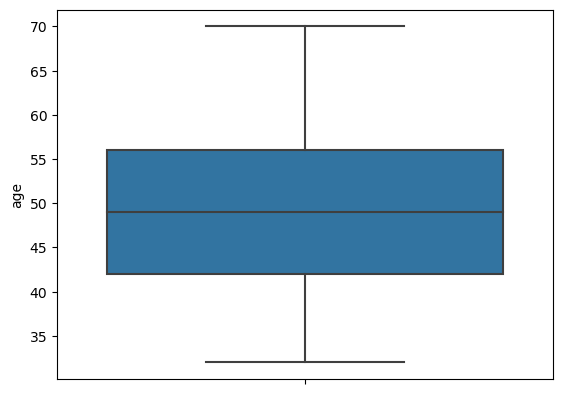

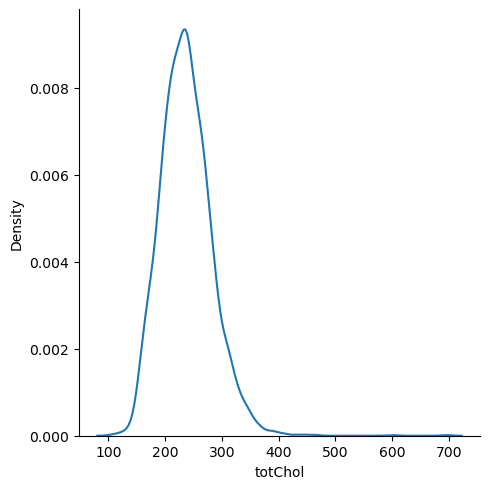

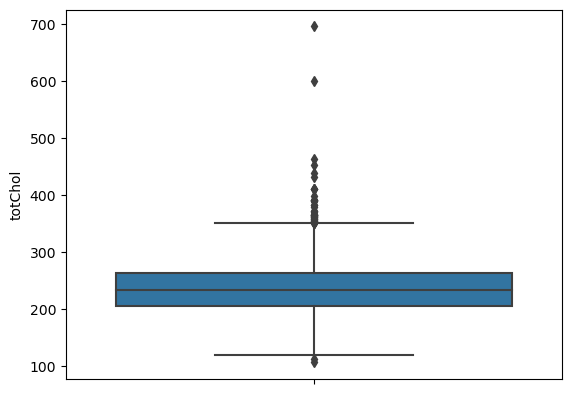

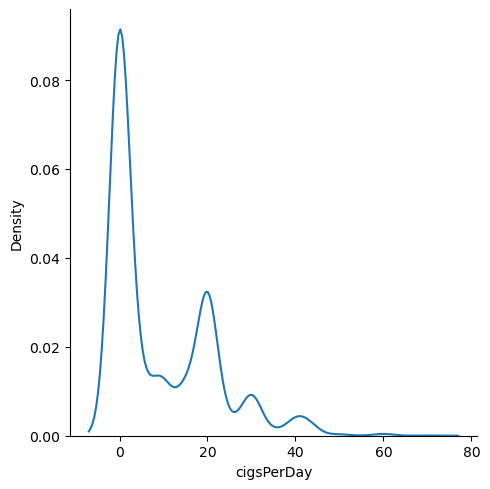

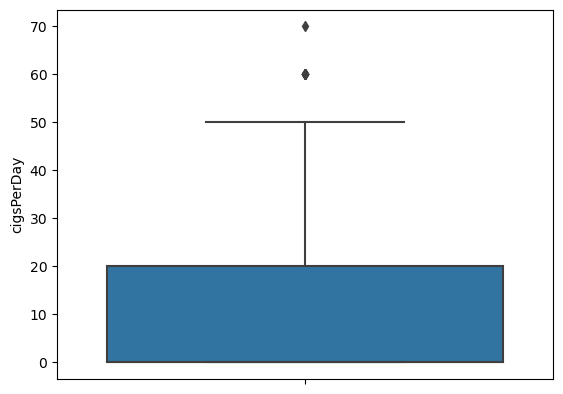

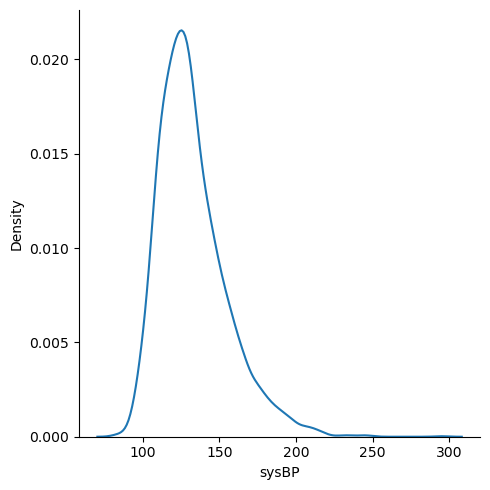

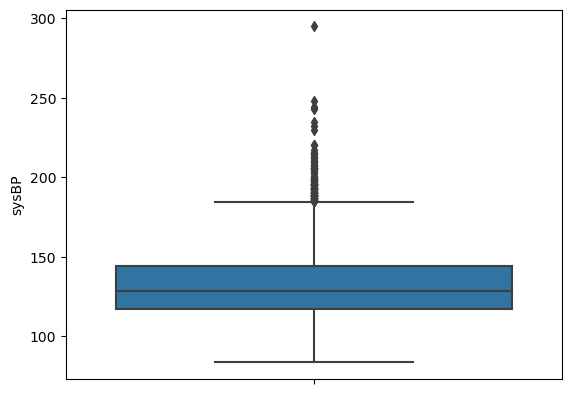

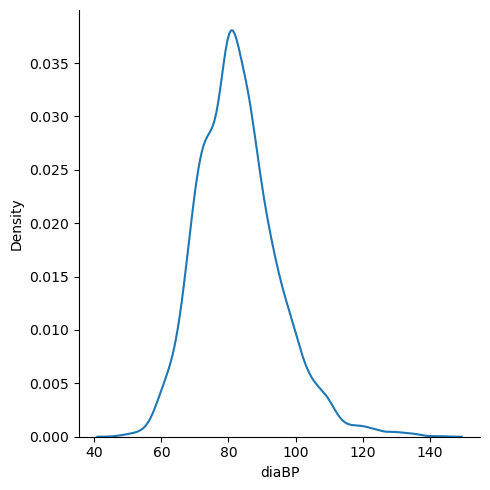

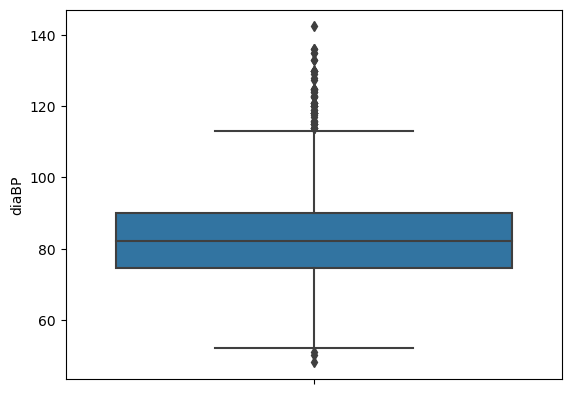

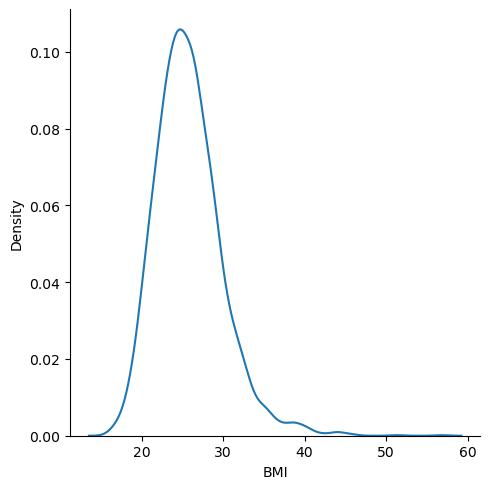

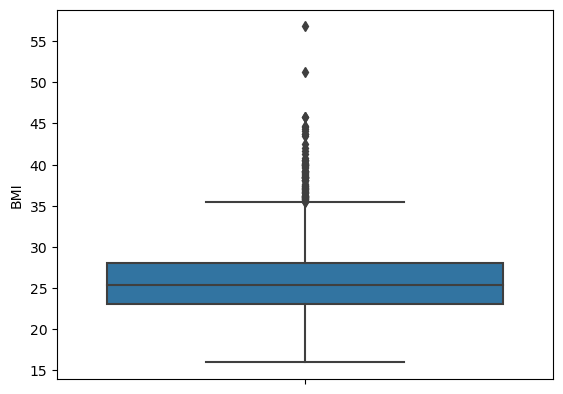

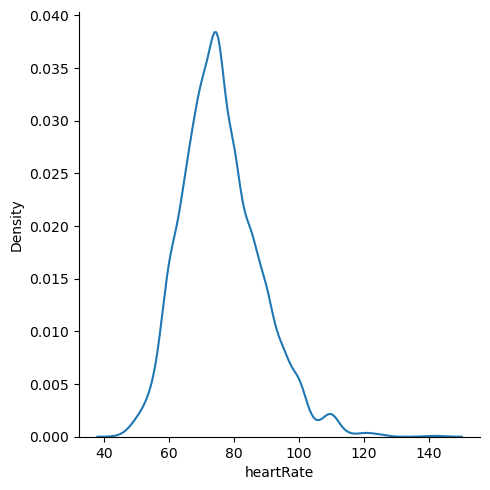

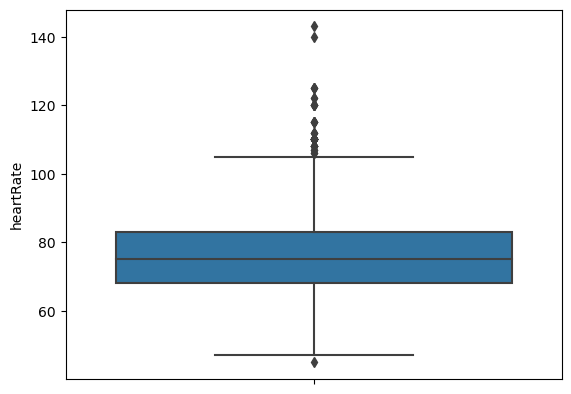

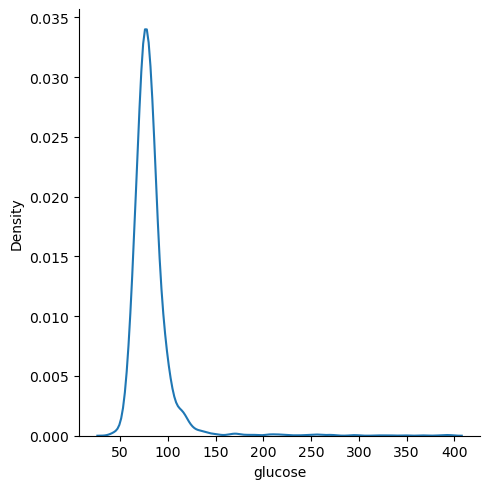

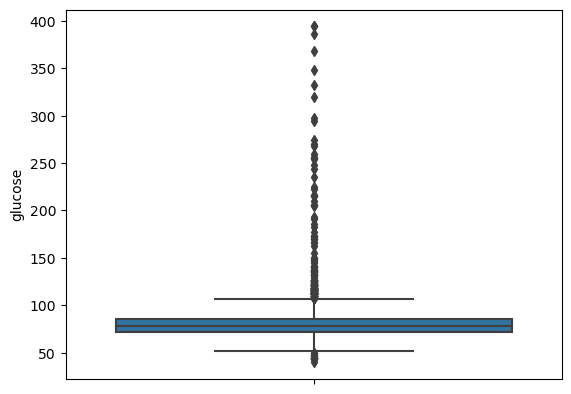

In [13]:
#Distribution and Outliers Analysis 
for v in num_features:
    sns_displot=sns.displot(data=data_df,x=v, kind="kde") #displot for distribution analysis
    plt.show()
    
    sns_boxplot=sns.boxplot(data= data_df,y=v)#boxplot for outlier analysis
    plt.show()

### <span style ="color:red;">Remarks :</span>

1. No ouliers and good diatribution is observed in age feature 
2. Ouliers are observed in "totChot","cigsPerDay,"sysBP","diaBP","BMI","heartrate" and "glucos" features

So,inorder to handle those outliers IQR method is implemented 

In [14]:
#Implementing IQR method for ouliers treatment
for v in [ "totChol","cigsPerDay","sysBP","diaBP","BMI","heartRate"]:
    vals=data_df[v].quantile([0.25,0.75])
    iqr=vals.values[1]-vals.values[0]
    min_lim,max_lim = vals.values[0]-1.5*iqr,vals.values[1]+1.5*iqr
#Assigning those outliers with min and max values 
    data_df[v]=data_df[v].apply(lambda x : min_lim if x < min_lim else x)
    data_df[v]=data_df[v].apply(lambda x : max_lim if x < max_lim else x)
    
    print(vals)

0.25    206.0
0.75    264.0
Name: totChol, dtype: float64
0.25     0.0
0.75    20.0
Name: cigsPerDay, dtype: float64
0.25    117.0
0.75    144.0
Name: sysBP, dtype: float64
0.25    74.5
0.75    90.0
Name: diaBP, dtype: float64
0.25    23.0300
0.75    27.9975
Name: BMI, dtype: float64
0.25    68.0
0.75    83.0
Name: heartRate, dtype: float64


Since "glucose" feature is having very high outliers, iam assigning max limit as 145 (Because in medicial terms glucose level above 145 is considered to be high ) 

In [24]:
#Implementing IQR mentod 
for v in ["glucose"]:
    vals=data_df[v].quantile([0.25,0.75])
    iqr=vals.values[1]-vals.values[0]
    min_lim,max_limt =vals.values[0]-1.5*iqr,vals.values[1]+1.5*iqr
#Assigning those outliers with min and max 
    data_df[v]=data_df[v].apply(lambda x : min_lim if x < min_lim else x)
    data_df[v]=data_df[v].apply(lambda x : max_lim if x > max_lim else x )
    
    print(vals)

0.25    72.0
0.75    86.0
Name: glucose, dtype: float64


# <span style = "color:red;"> Exploratory Data Analysis </span>

in exploratory data analysis the approach used is :

. All categorical features is analysed w.r.t each other and the target variable 

. All numeric features is analysed w.r.t each other, target feature and categorical feature 



## <span style ="color:red;">Analysing each categorical feature with respect to each other</span>

To understand data concerning categorical feature, I used count plot and barplot (To understand percentage distribution ) and analysed each feature with respect to each other 

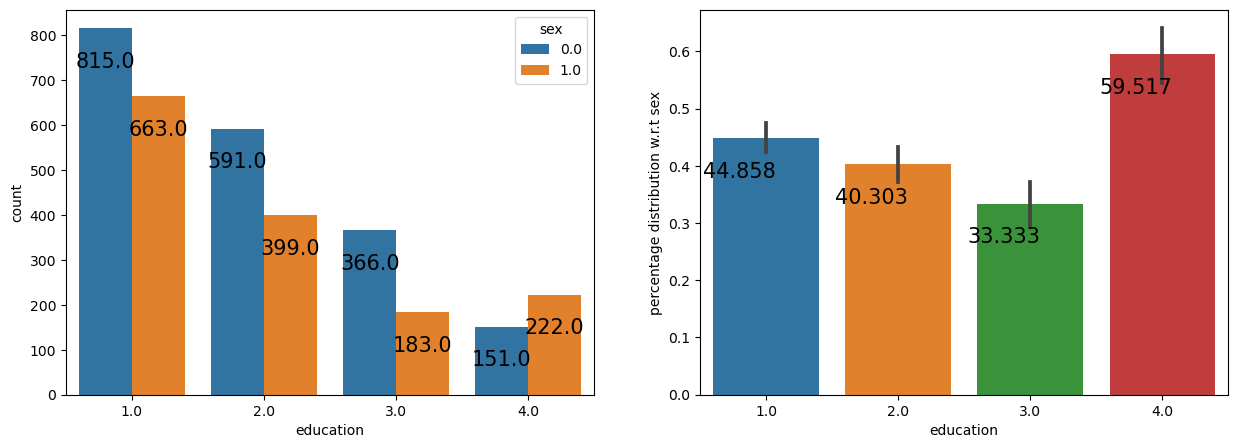

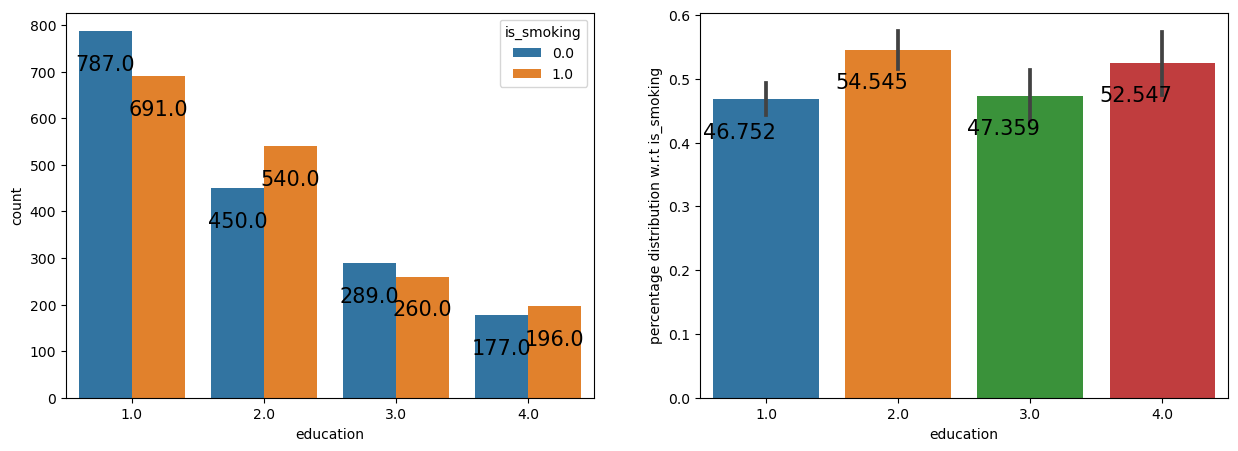

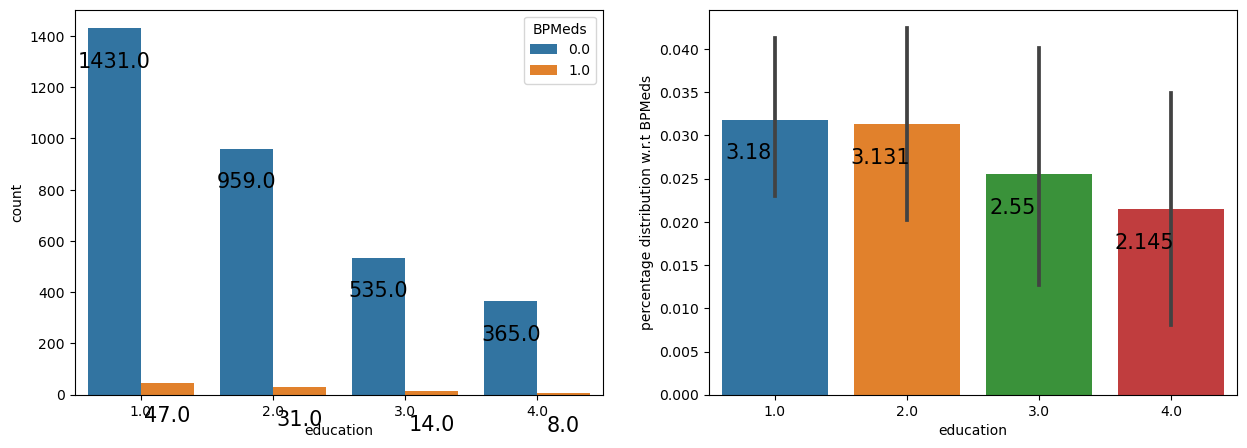

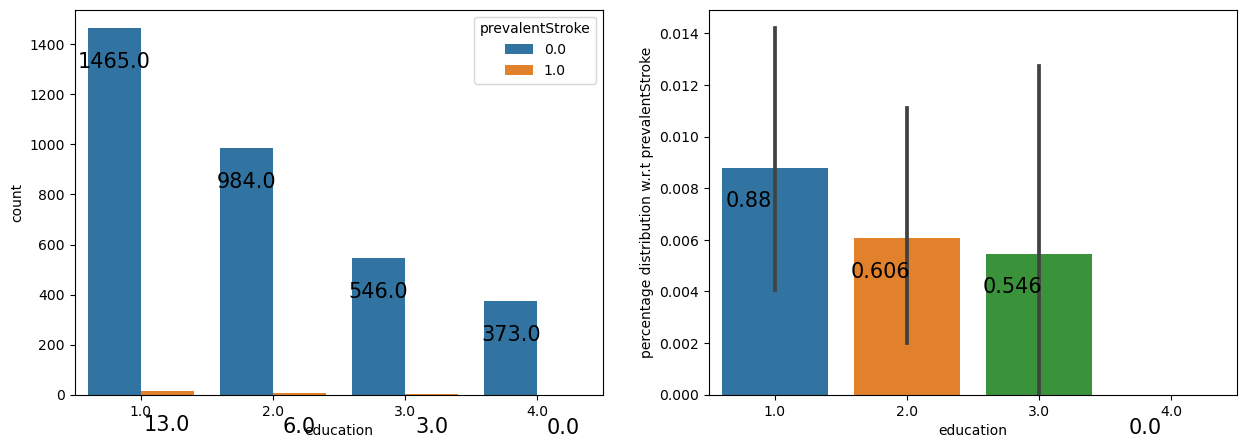

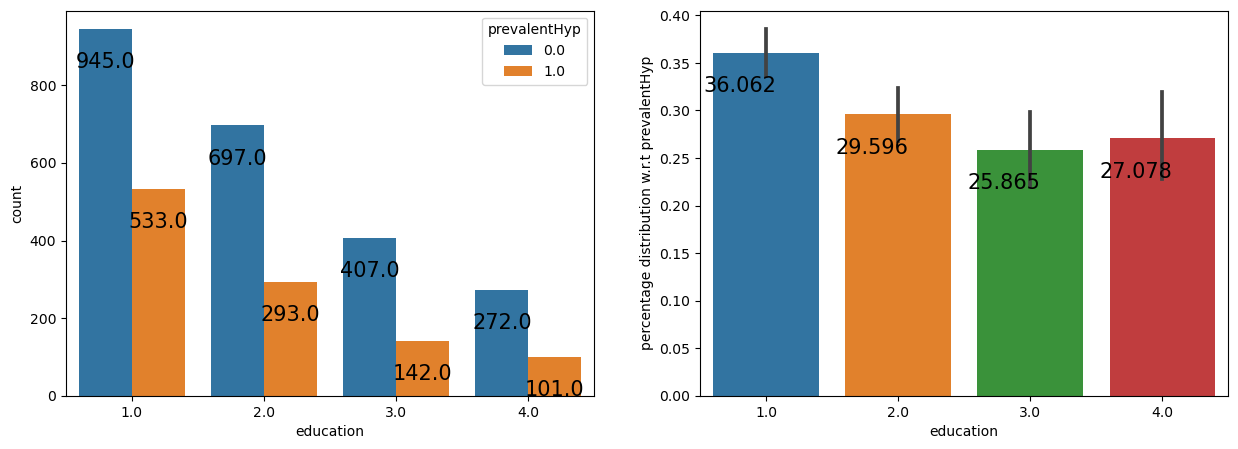

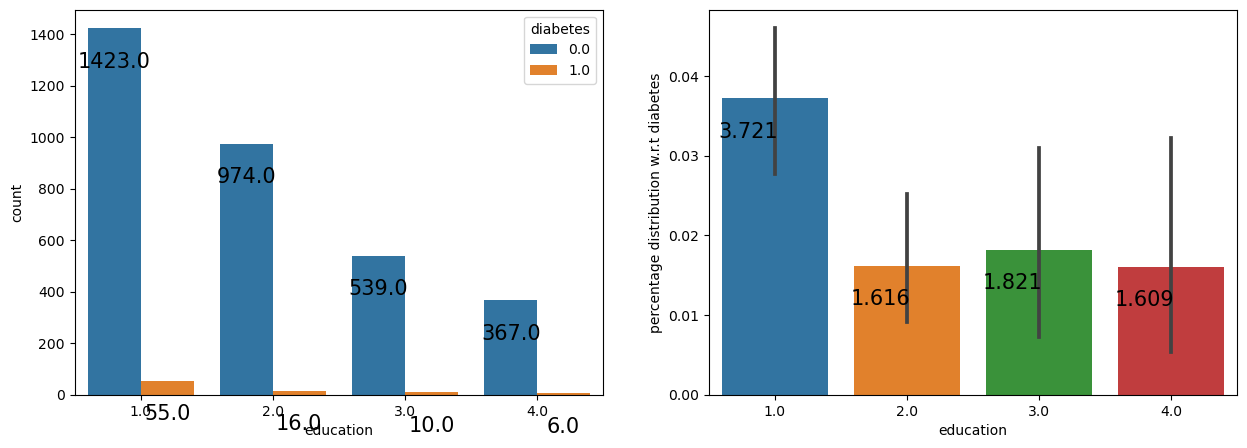

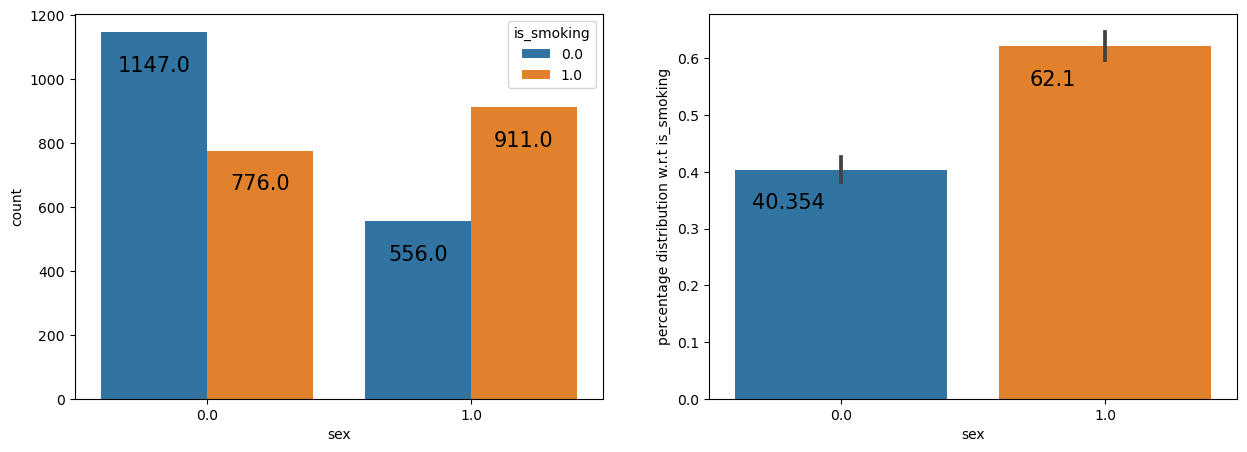

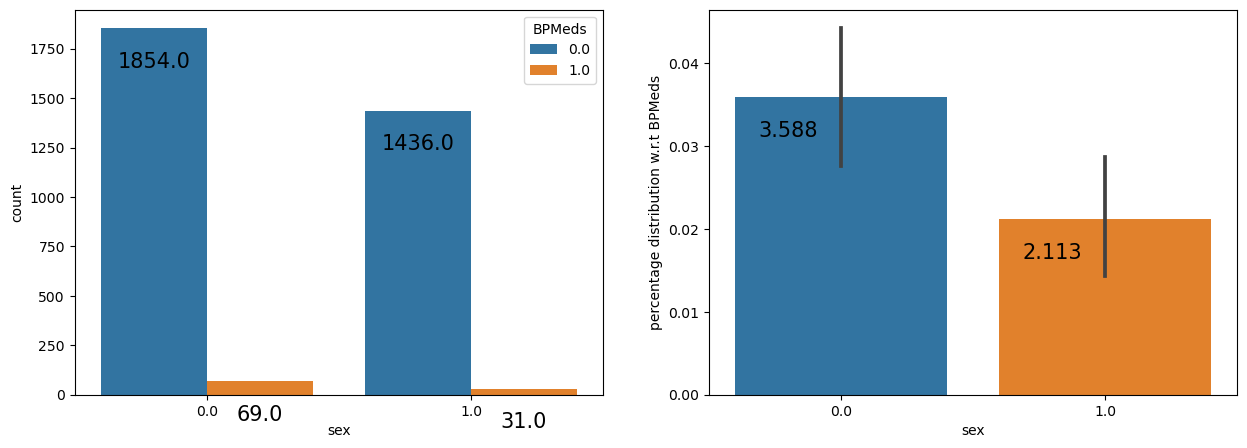

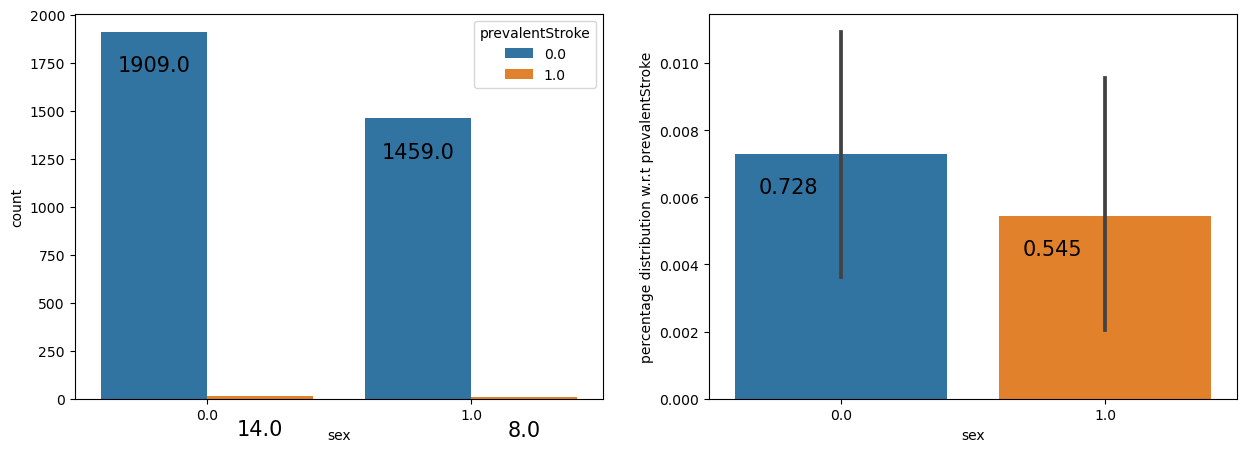

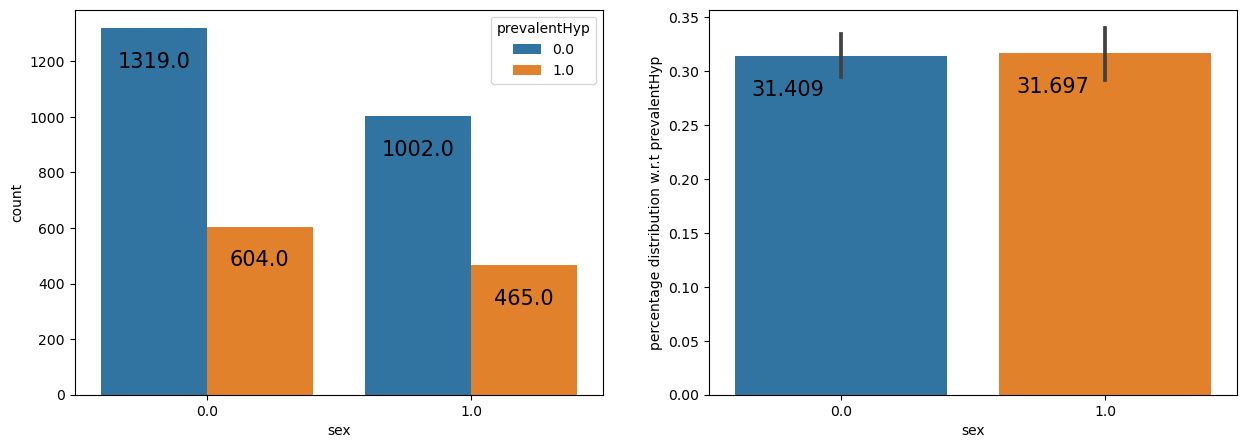

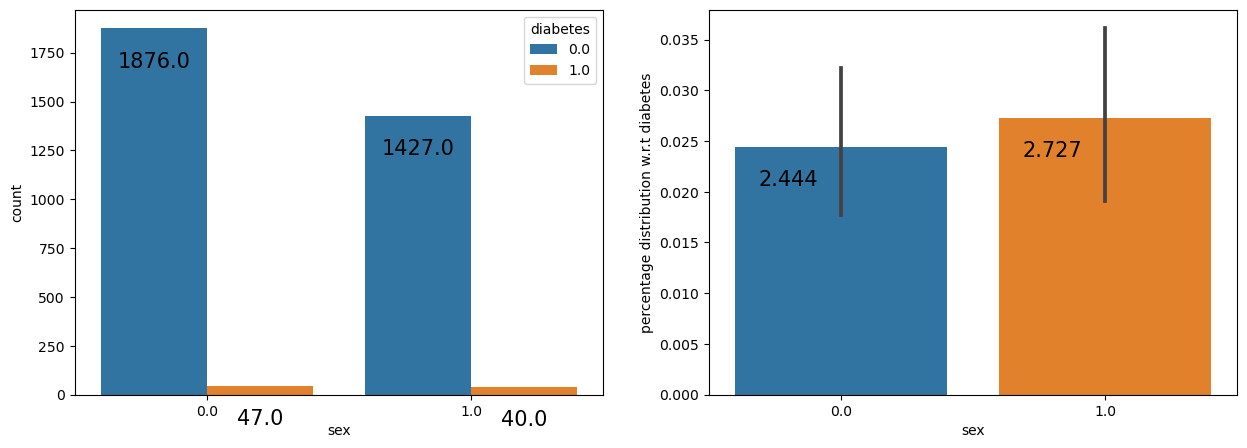

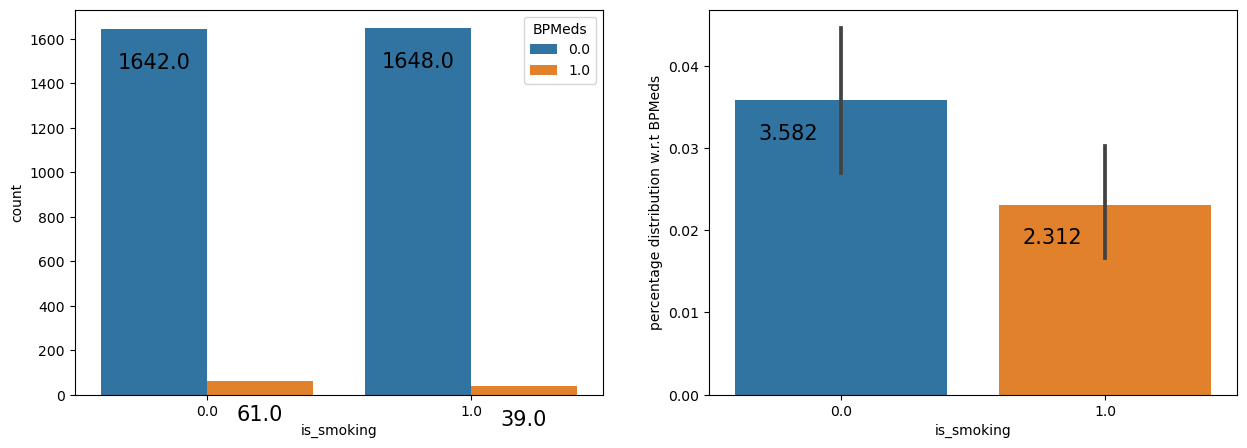

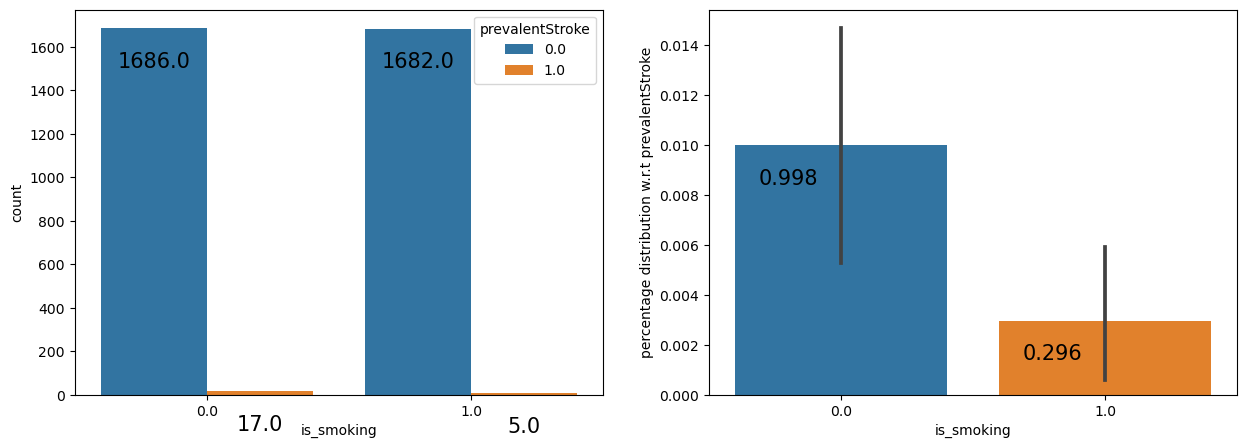

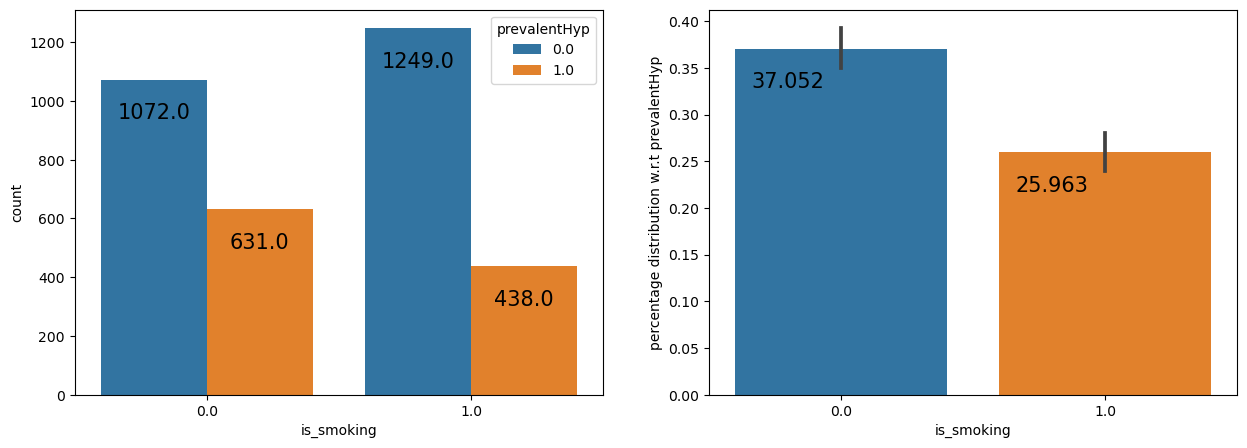

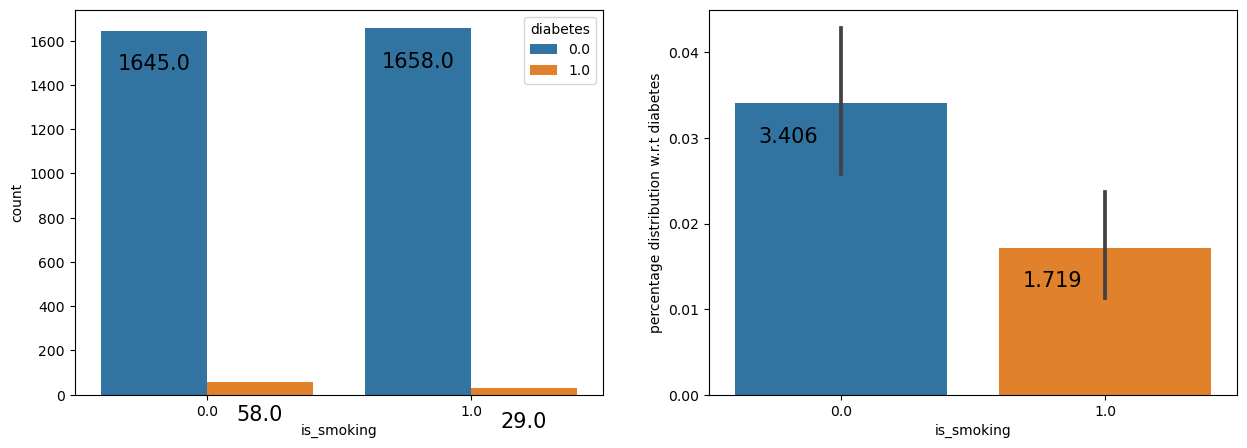

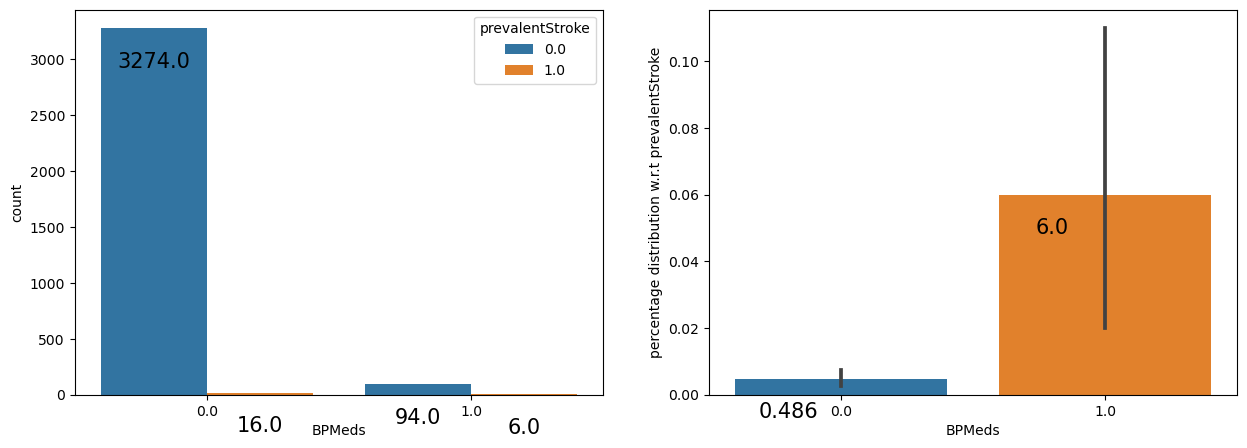

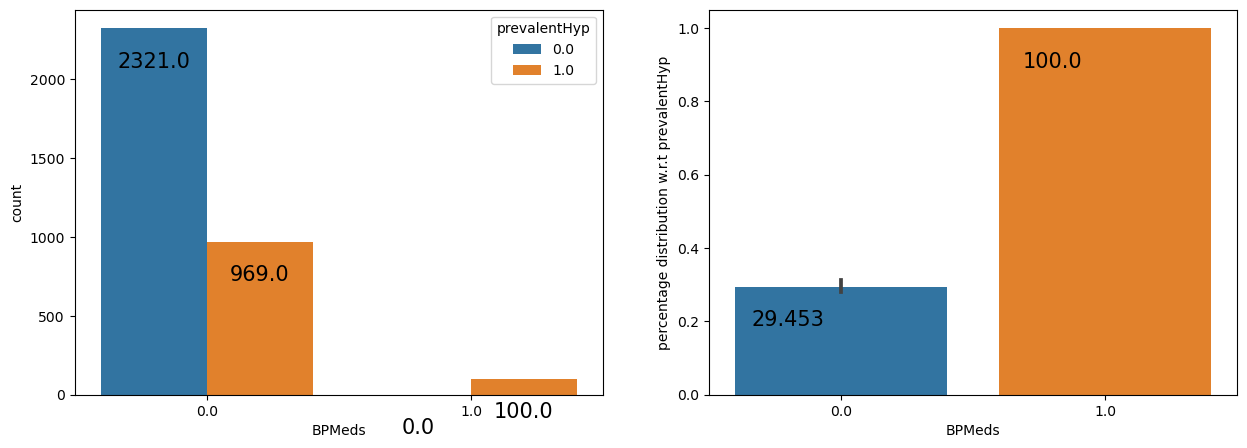

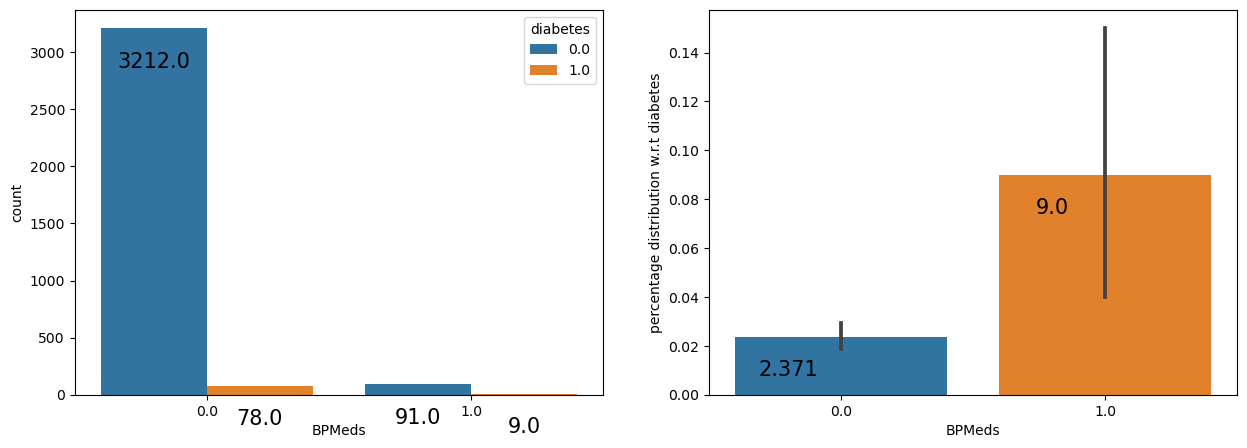

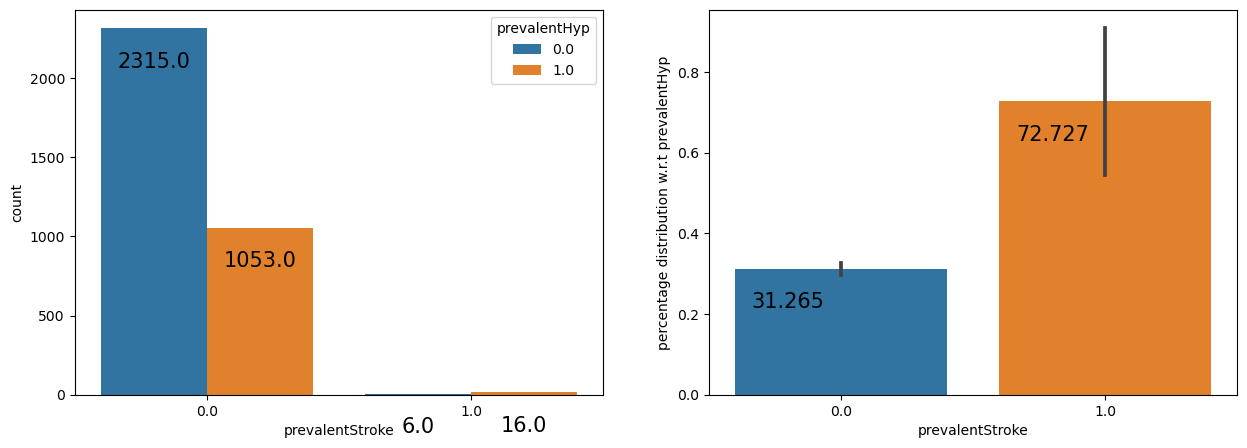

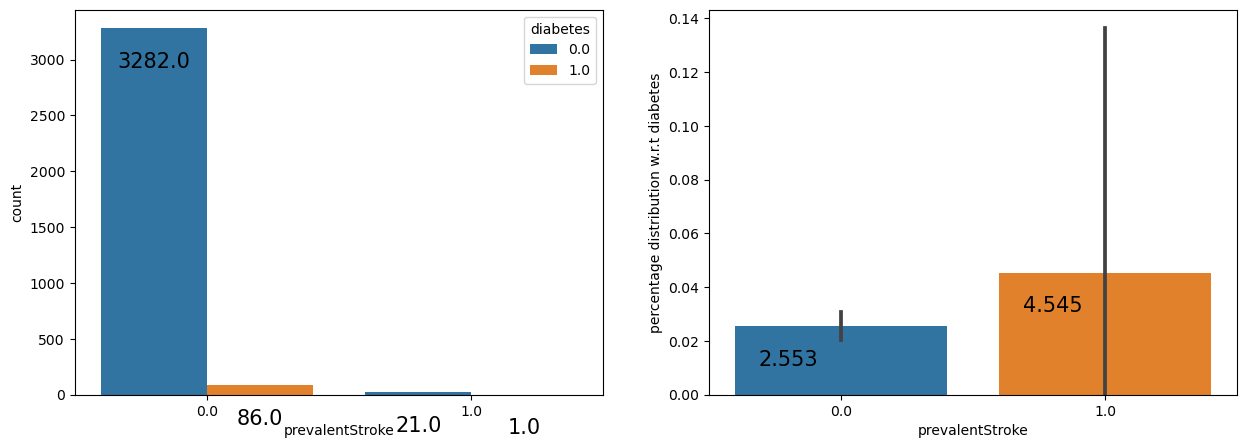

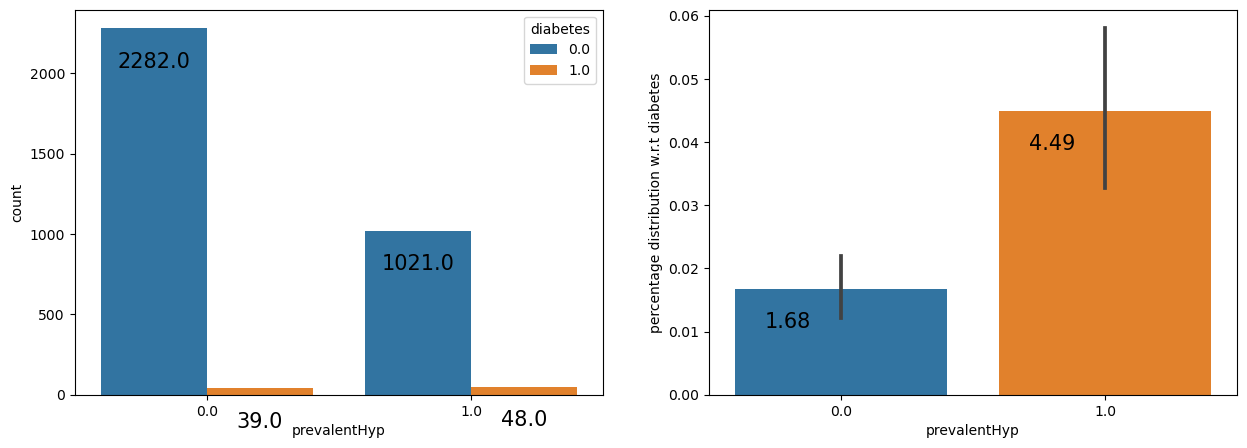

In [25]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
temp_list=['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']#creating a temp_list of categorical features to use in below coding
i=0
for v in ['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
    i=i+1
    for z in temp_list[i:7]:#creating for loop using temp list of categorical features to  avoid repeatation of ploting
      fig, axes = plt.subplots(1,2,figsize=(15,5))
      ch=sns.countplot(x=v,hue=z,data=data_df, ax=axes[0])#countplot
      for p in ch.patches:
           ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
      vh = sns.barplot(x=v, y=z, data=data_df, ax=axes[1]) #barplot
      vh.set(ylabel=f'percentage distribution w.r.t {z}')
      for p in vh.patches:
           vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

### <span style ="color:red;"> Remarks :</span>

below mentioned are the key insights after analysising categorical features,

*   People attaining education 1 is high followed by 2,3 and 4
*   Males in education 1, 2 and 3 are comparatively less than females, but in the case of education-4 males are comparatively high than females.
*   Around 50% of people in all education types tend to be smokers.
*   Around 30% of people in all education types tend to have hypertension.
*   Males have higher chance to be a smoker.
*   Non-smokers tend to have a bit higher chance(37%) of hypertension issues compared to smokers(25%).
*   People on bp medication tend to have hypertension issues as well.
*   People on bp medication tend to have a bit higher chance to be diabetic by 9%.
*   People with prevalent stroke tend to have a higher chance(72%) of hypertension issues.
*   People with prevalent hypertension tend to have a bit higher chance of being diabetic.



# <span style ="color:red;">Categorical features with respect to target feature</span>

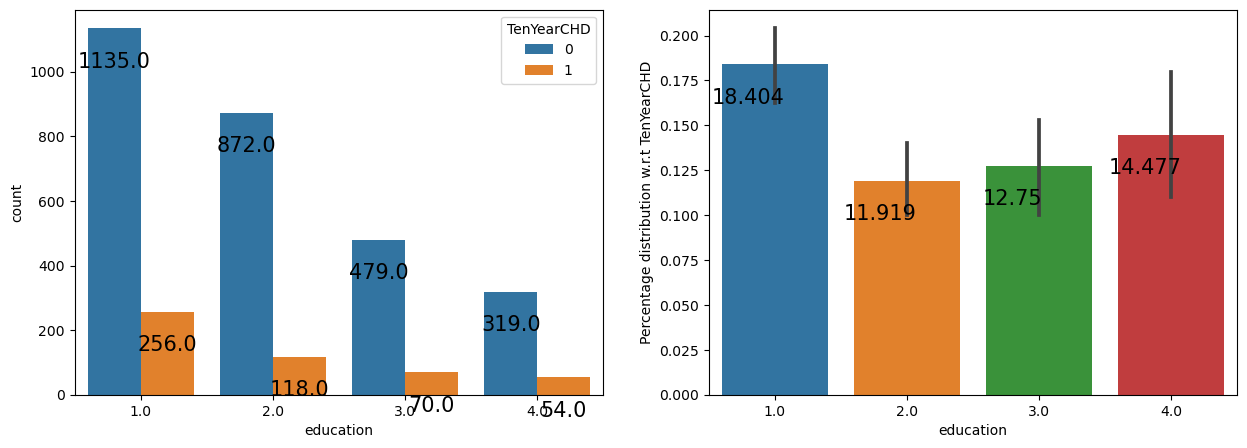

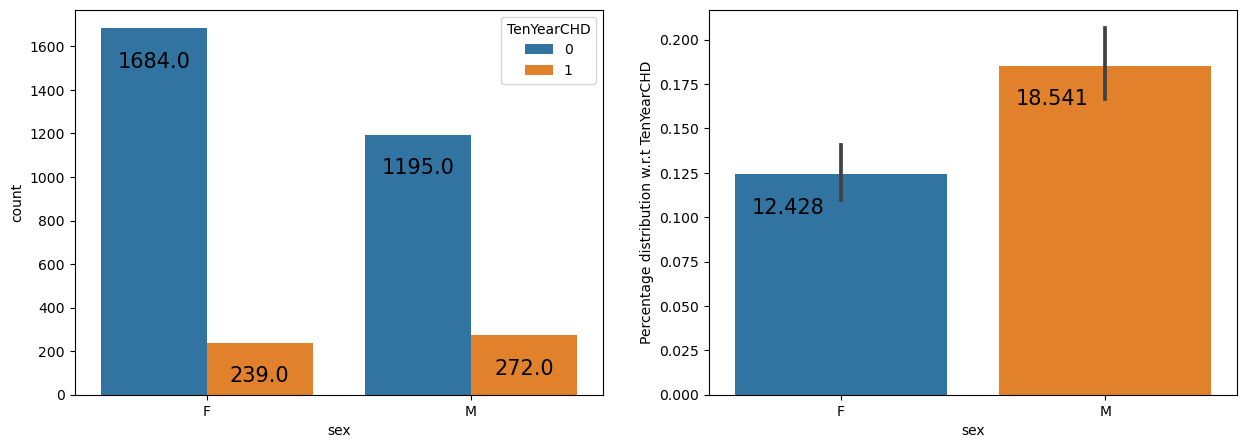

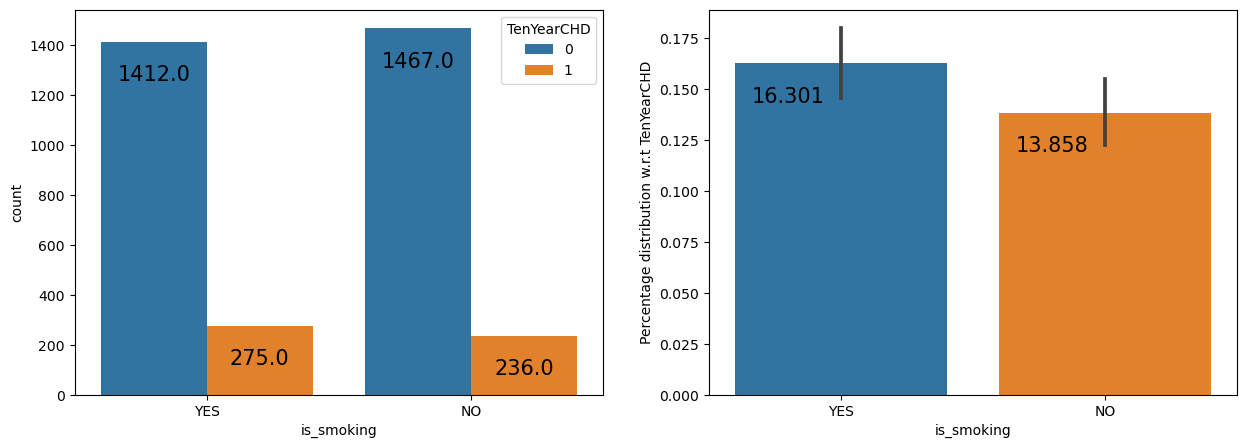

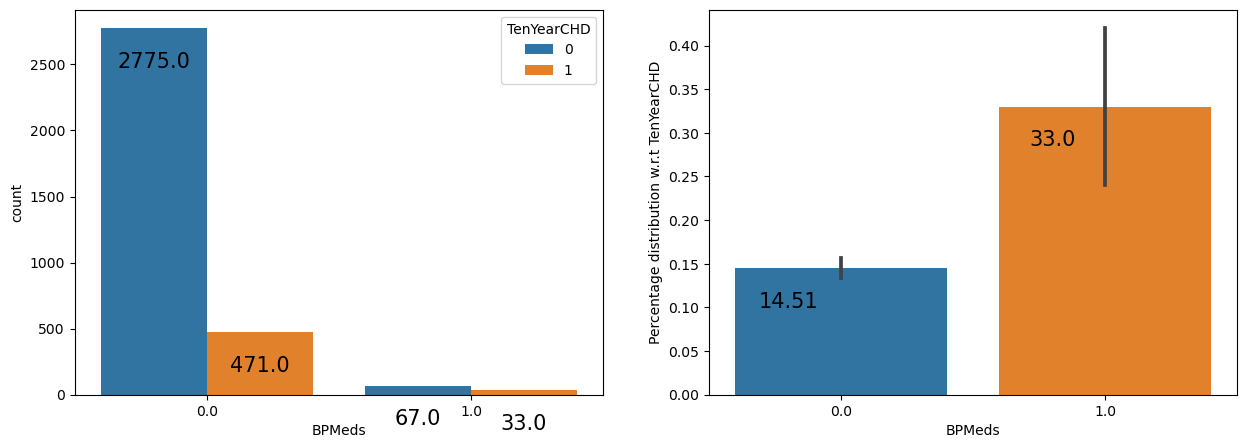

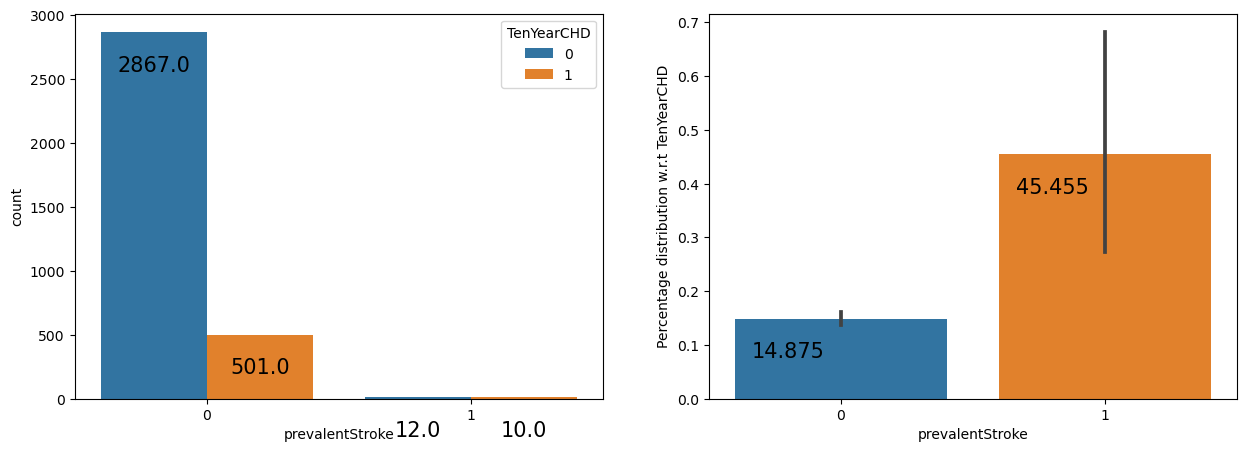

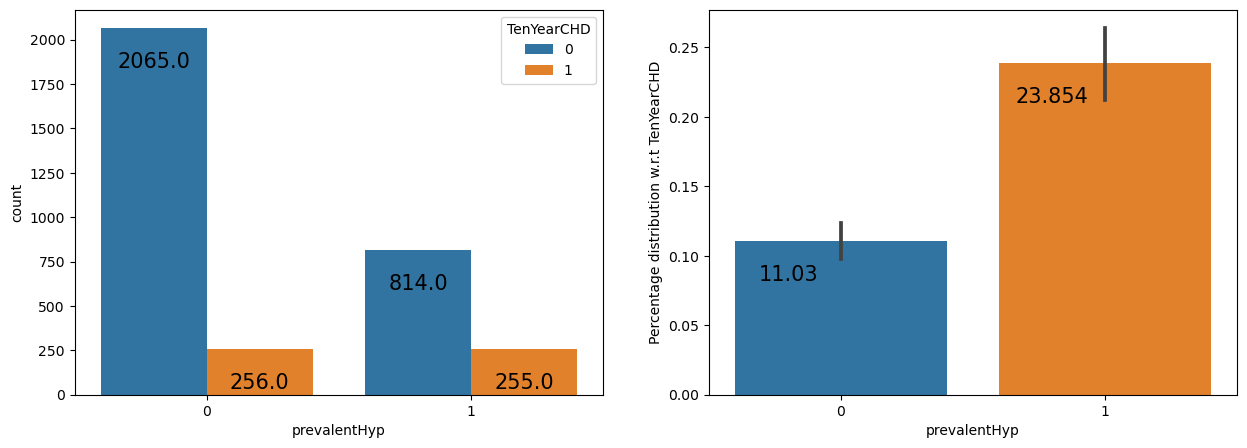

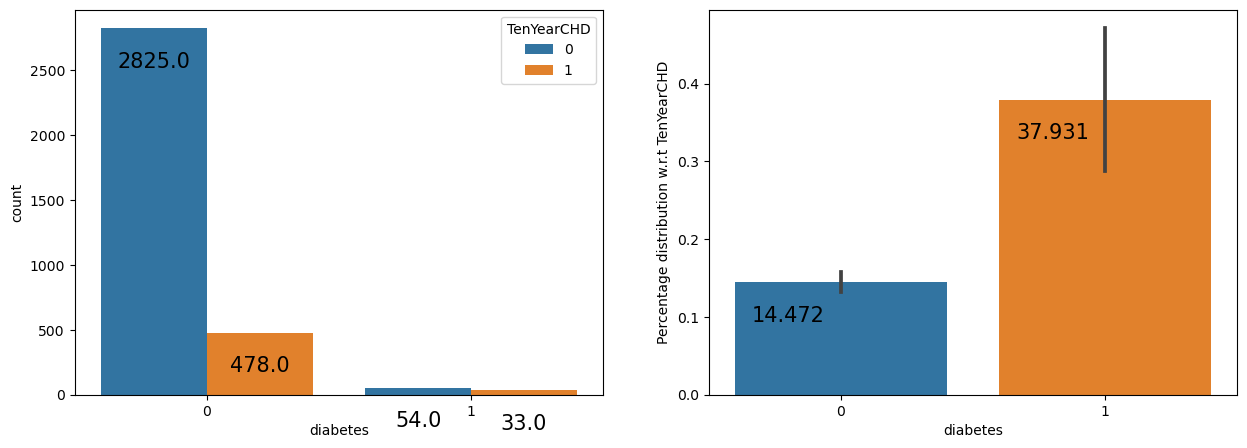

In [28]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
for v in cat_features:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Countplot
    ch = sns.countplot(x=v, hue='TenYearCHD', data=data_df, ax=axes[0])
    for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height()), ha='center', va='top', size=15)

    # Barplot
    vh = sns.barplot(x=v, y='TenYearCHD', data=data_df, ax=axes[1])  # Ensure no duplicate 'data' argument
    vh.set(ylabel='Percentage distribution w.r.t TenYearCHD')
    for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height() * 100, 3)}', (p.get_x() + 0.2, p.get_height()), ha='center', va='top', size=15)


**REMARKS:**



*   Males have a bit higher chance of CHD (18.5%) compared to females (12.4%).
*   Smokers have a bit higher chance of CHD (16.3%) compared to females (13.8%).
*   People with BP medication, prevalent stroke, prevalent hypertension and/or diabetes have a higher chance of CHD compared to others.

## Analysing Numerical features with respect to categorical features


### Analysis with respect to age

**Analysising age feature with respect to other categorical features :**


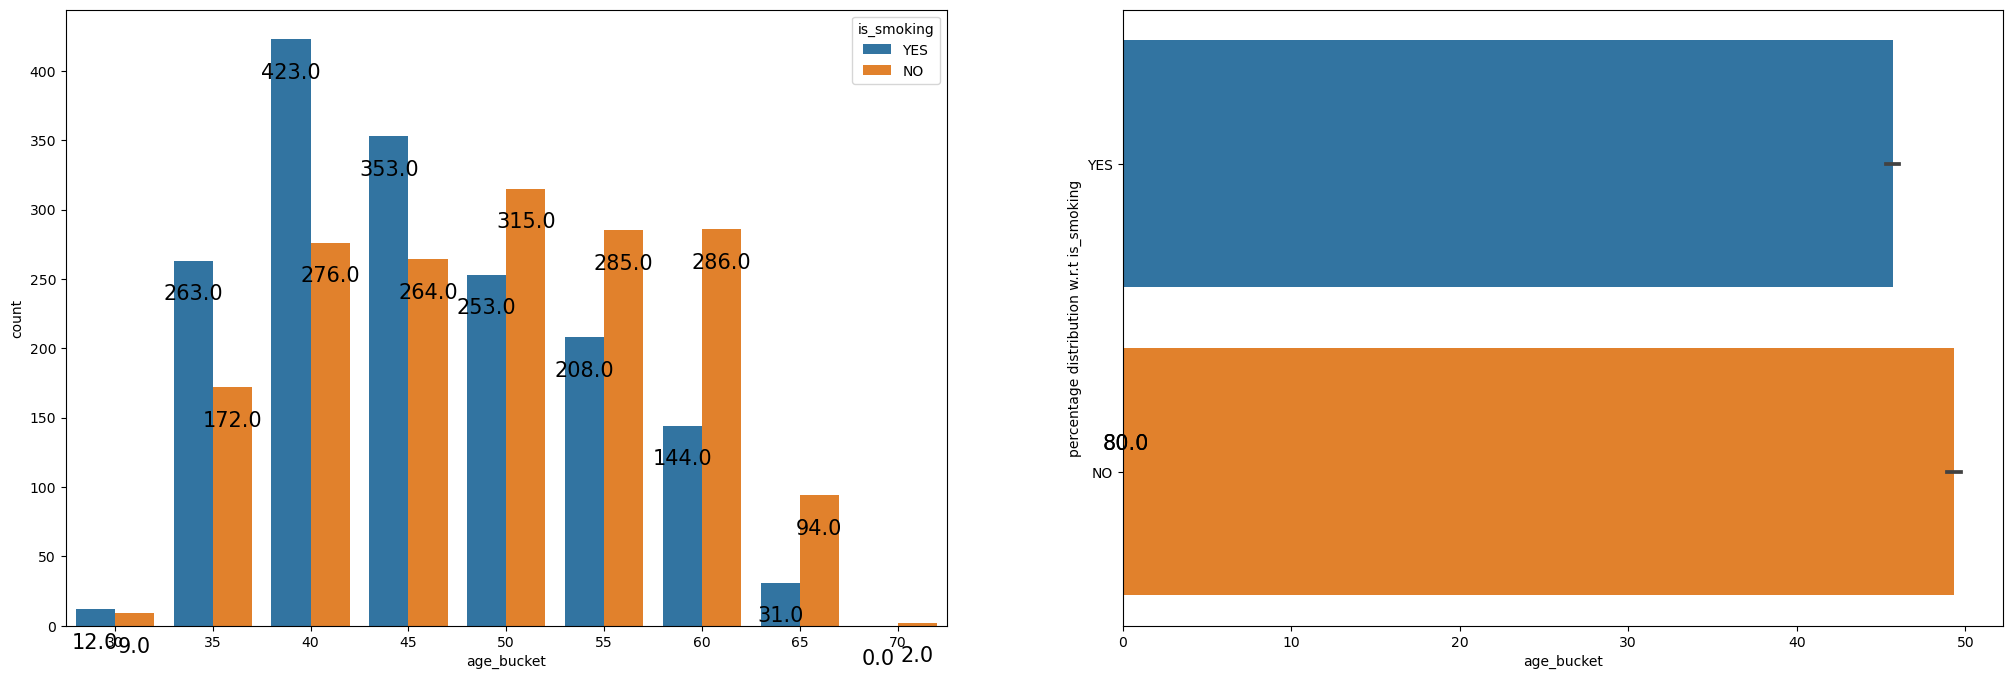

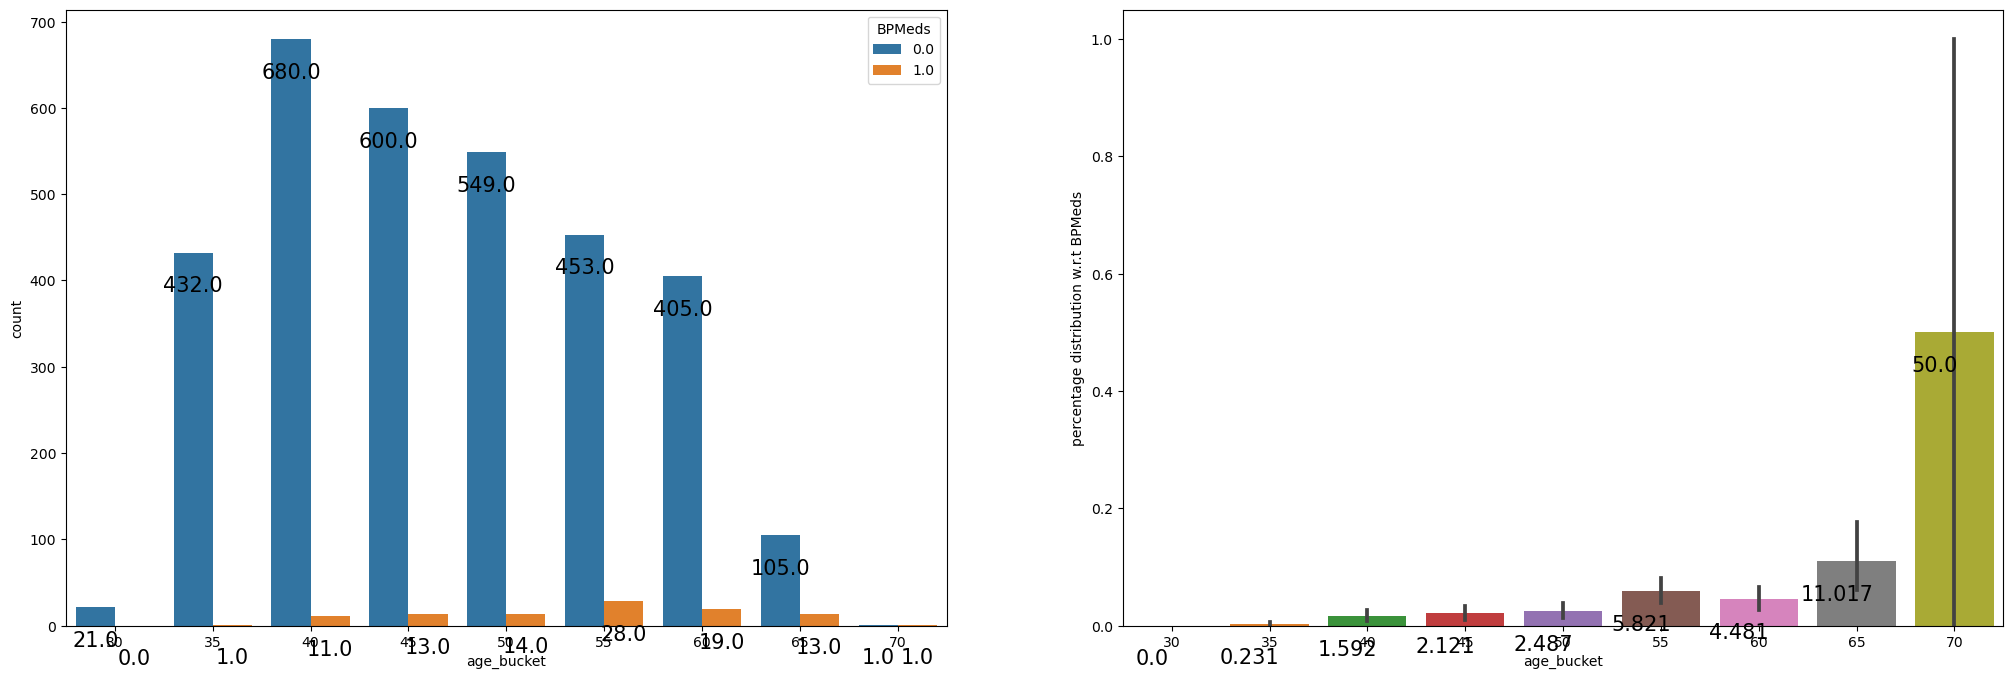

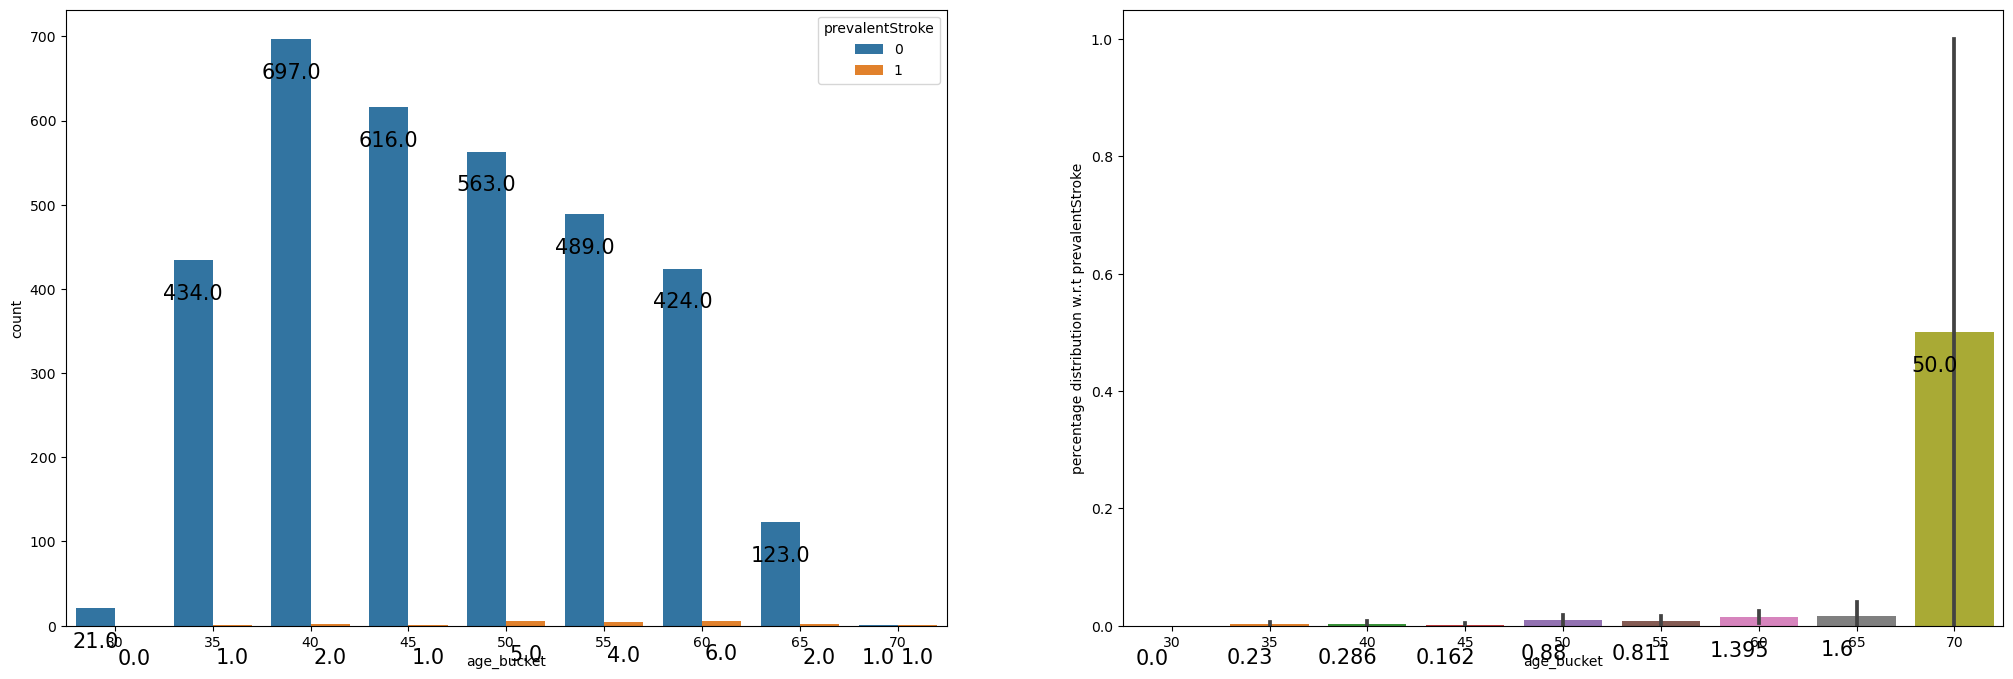

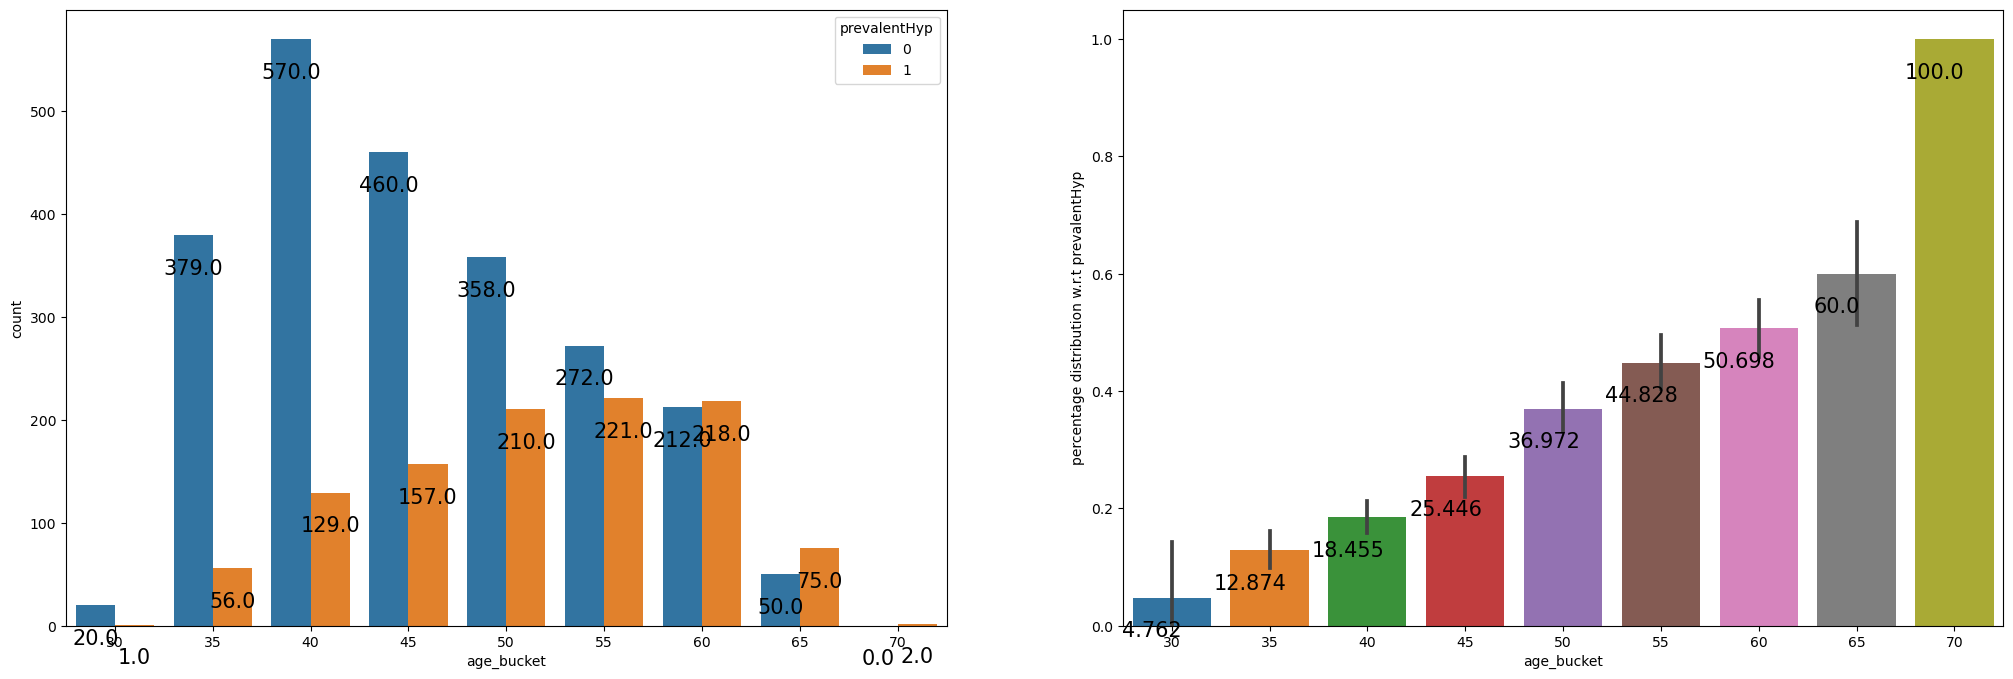

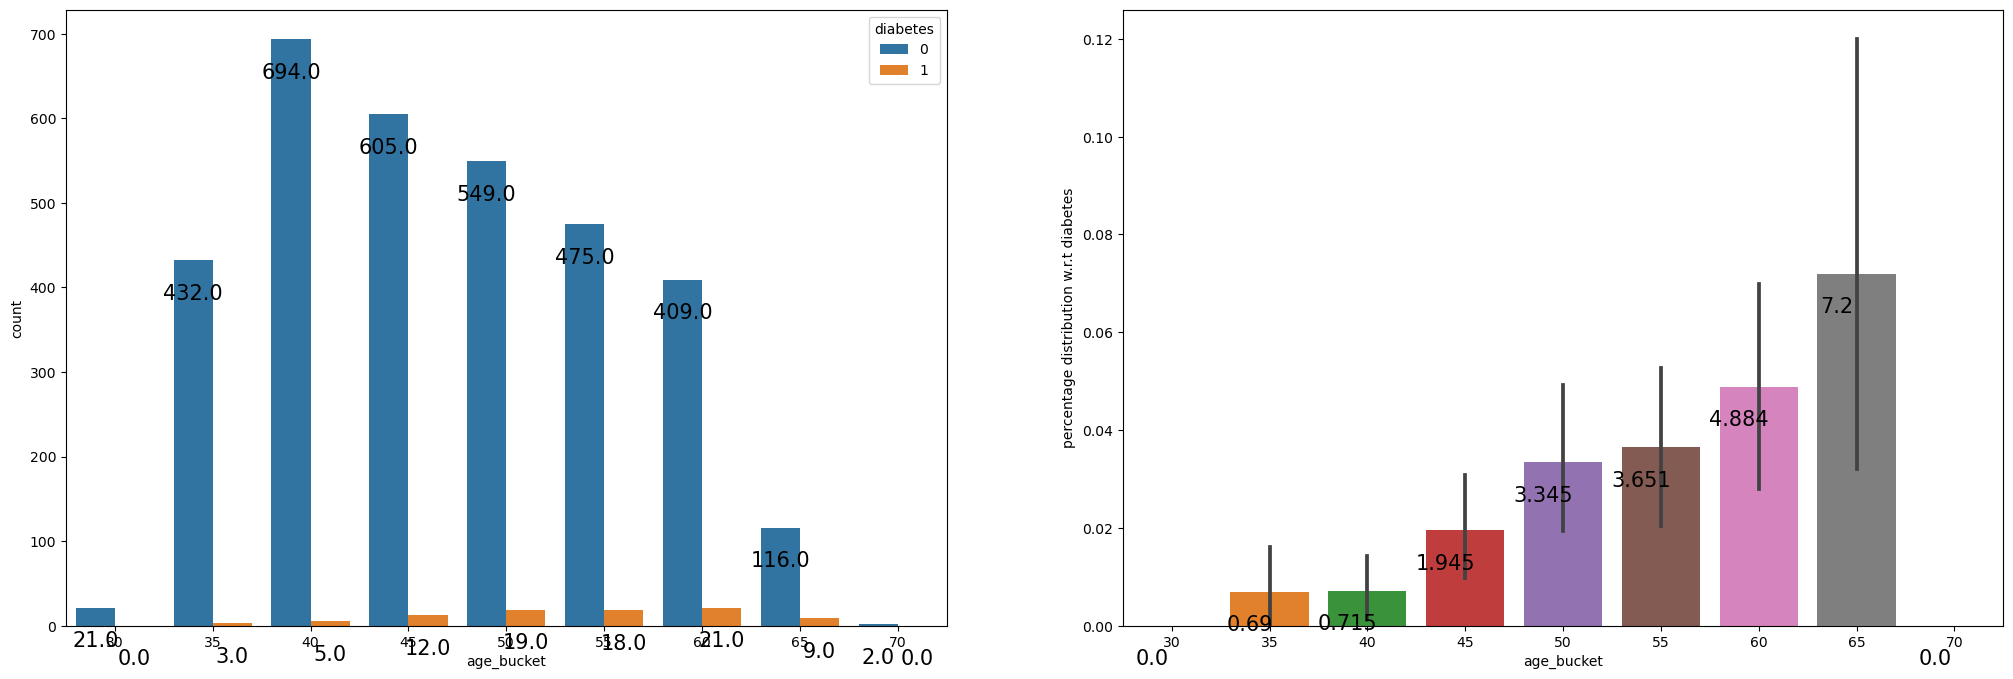

In [31]:
#For better further analysis binning is implemented on age feature
data_df['age_bucket'] = data_df['age'].apply(lambda x : 5*(x//5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='age_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot(x= 'age_bucket',y = v, data = data_df, ax=axes[1]) #Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Smoking habits tend to decrease with an increase in age.
*   Bp, hypertension and diabetes issues tend to increase with increases in age.


### Analysis with respect to totChol

**Analysising totChol feature with respect to other categorical features :**

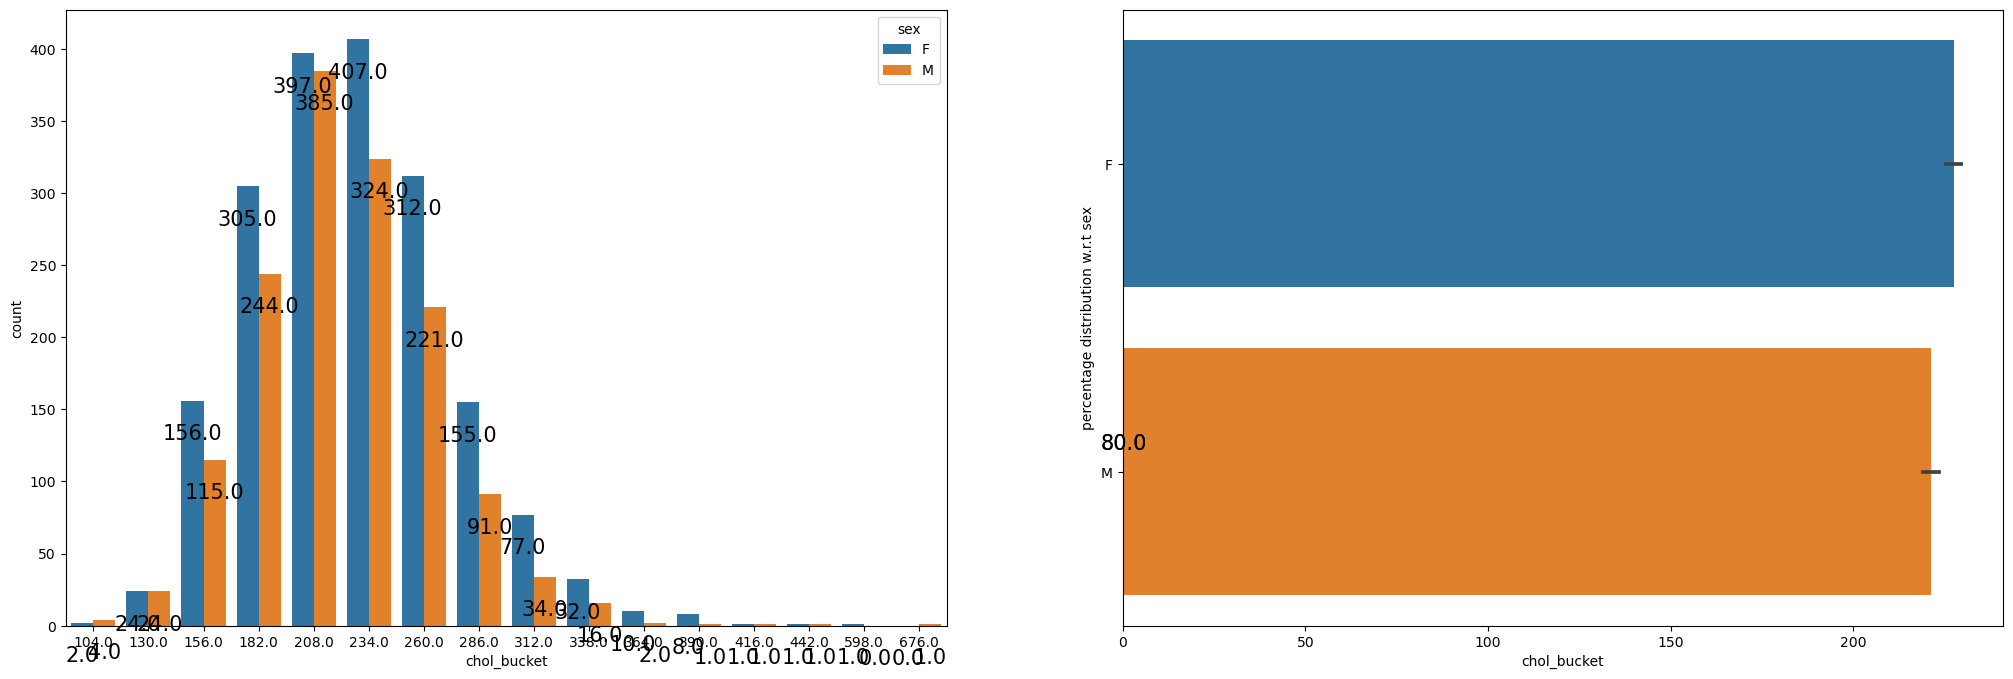

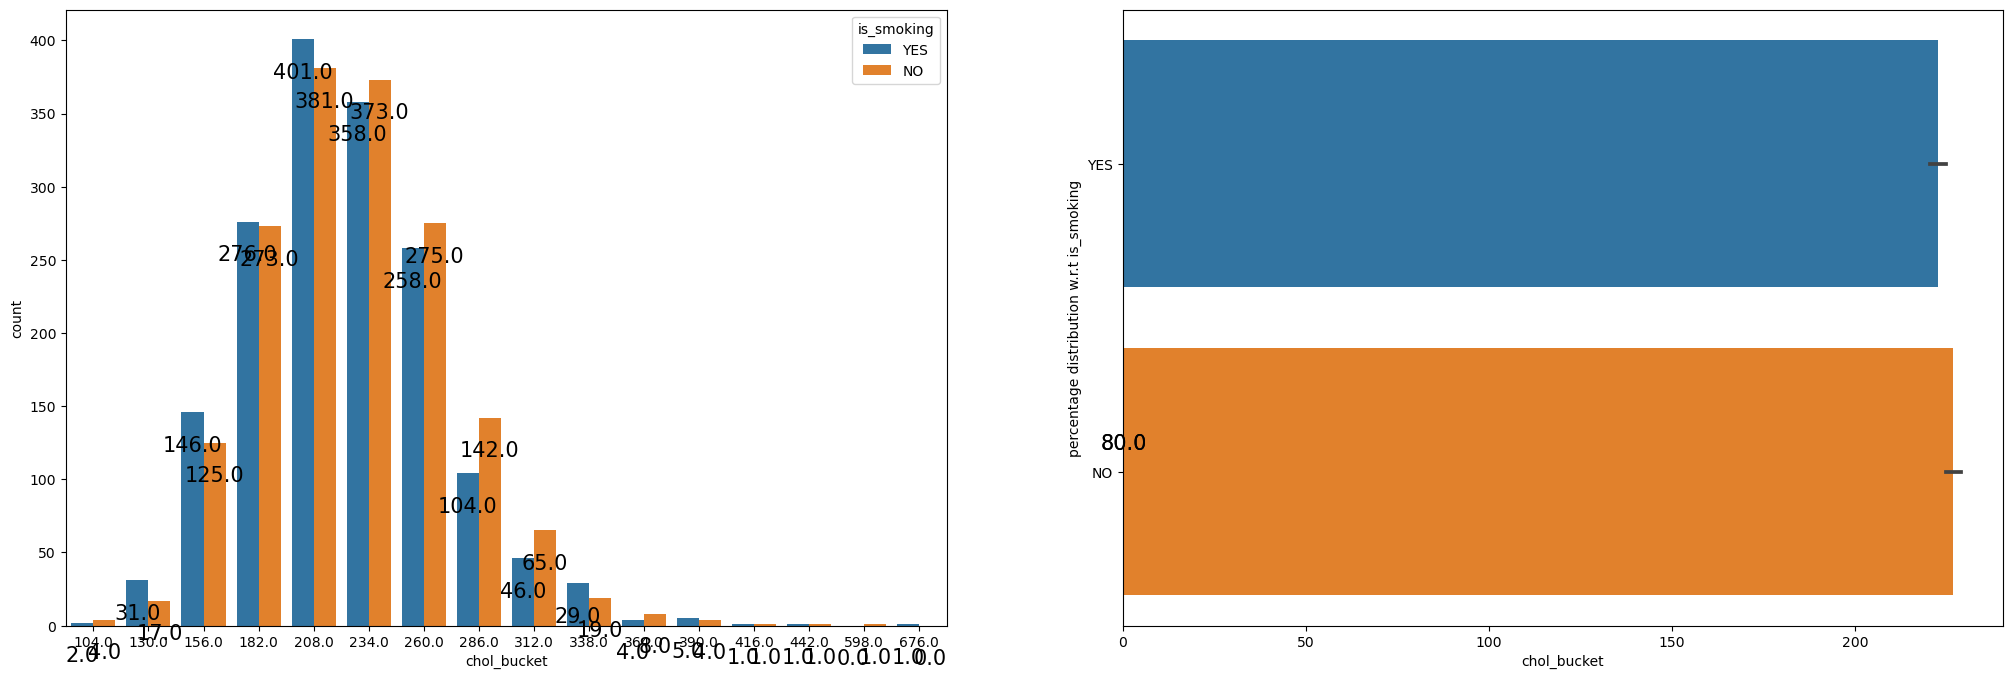

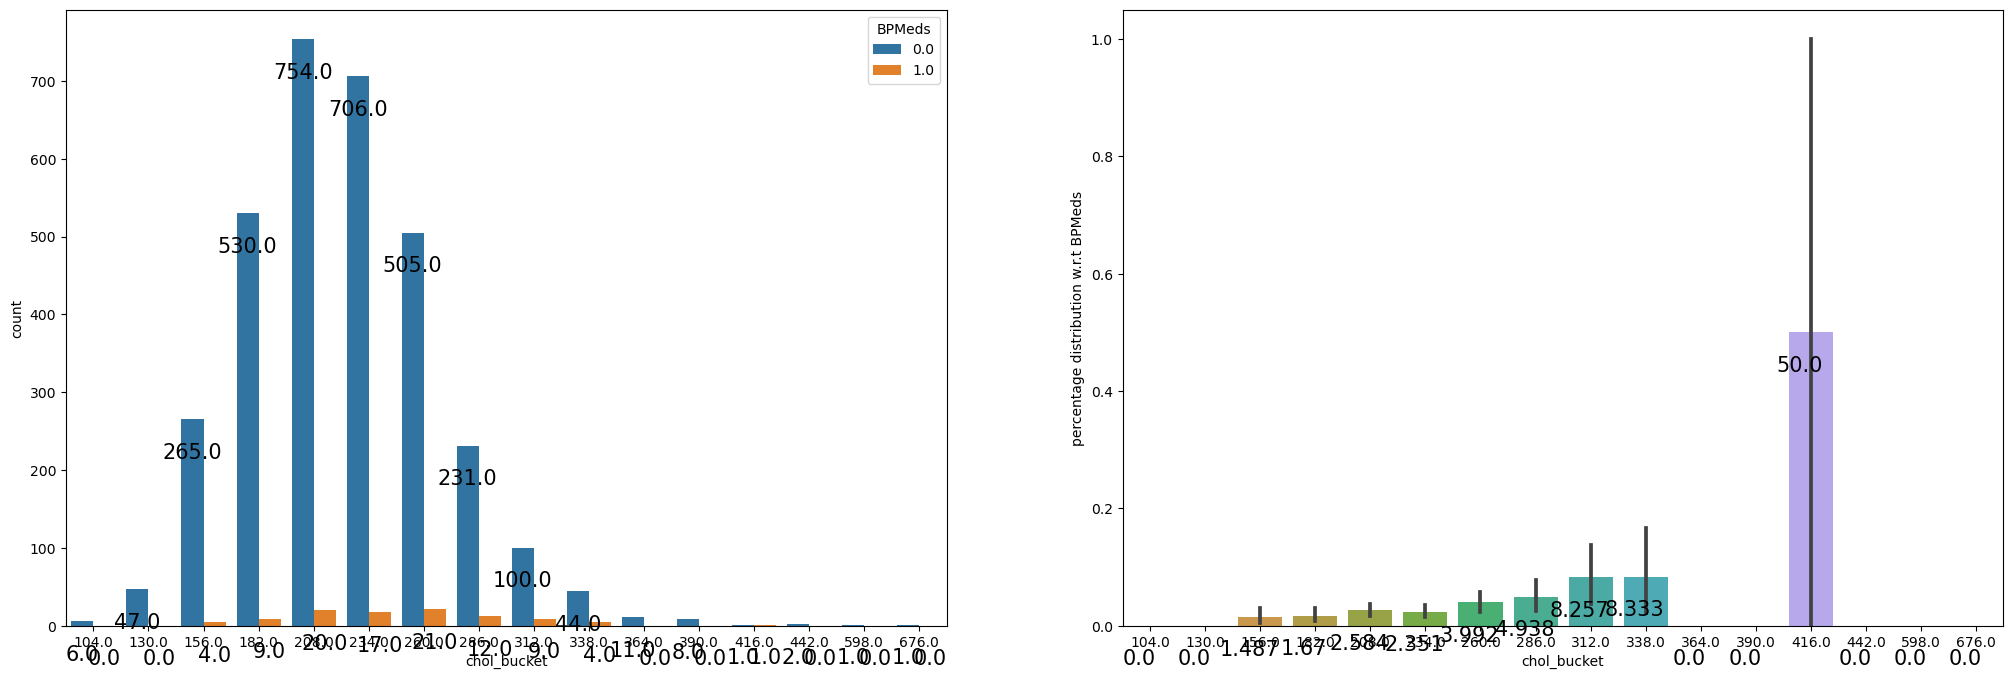

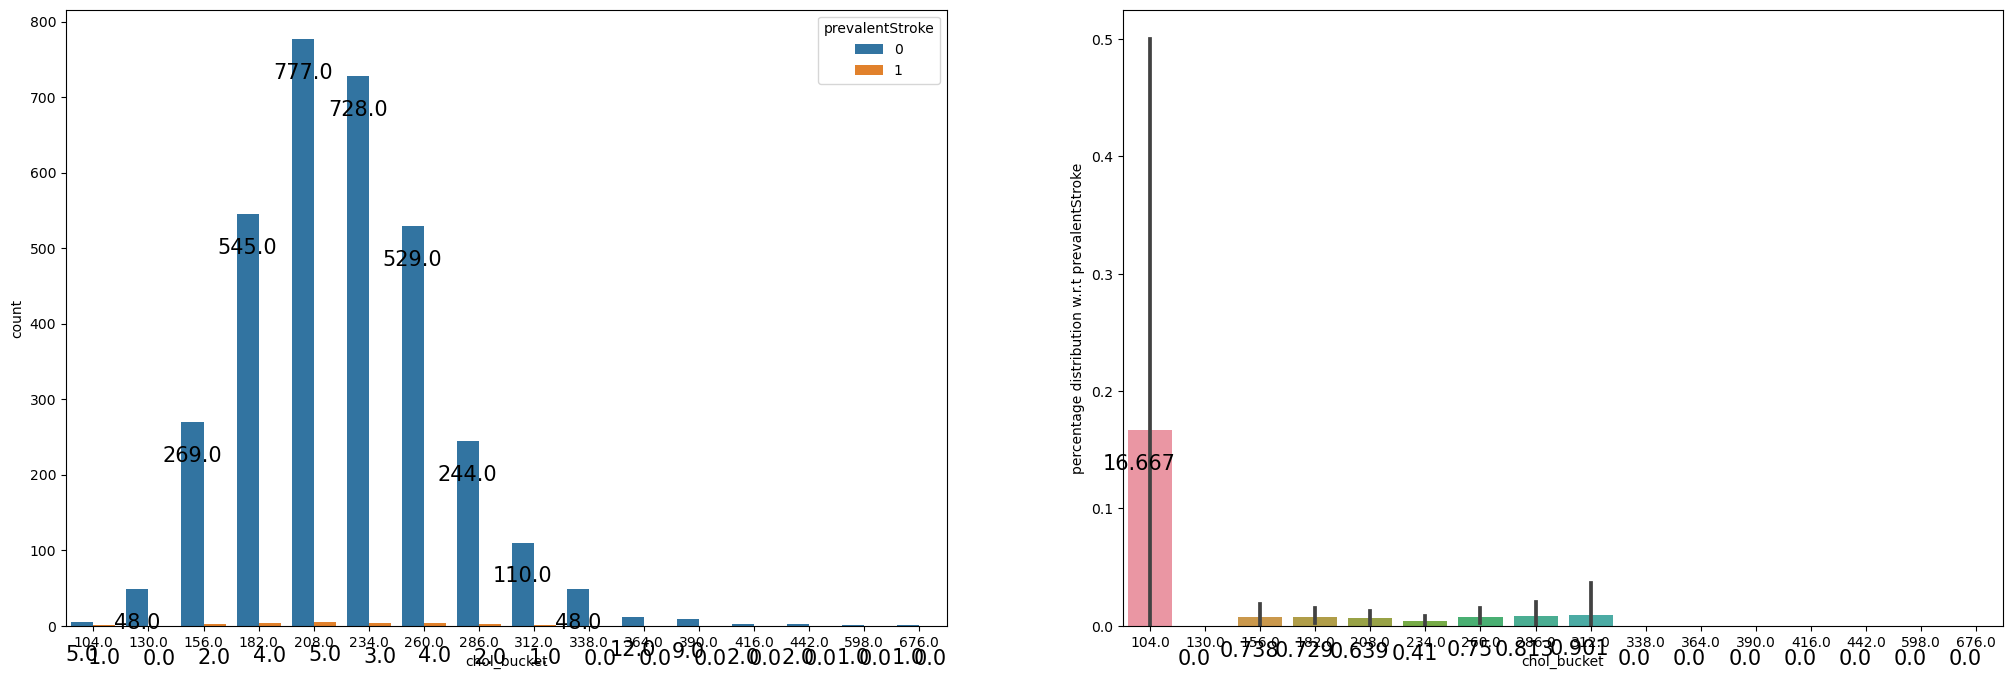

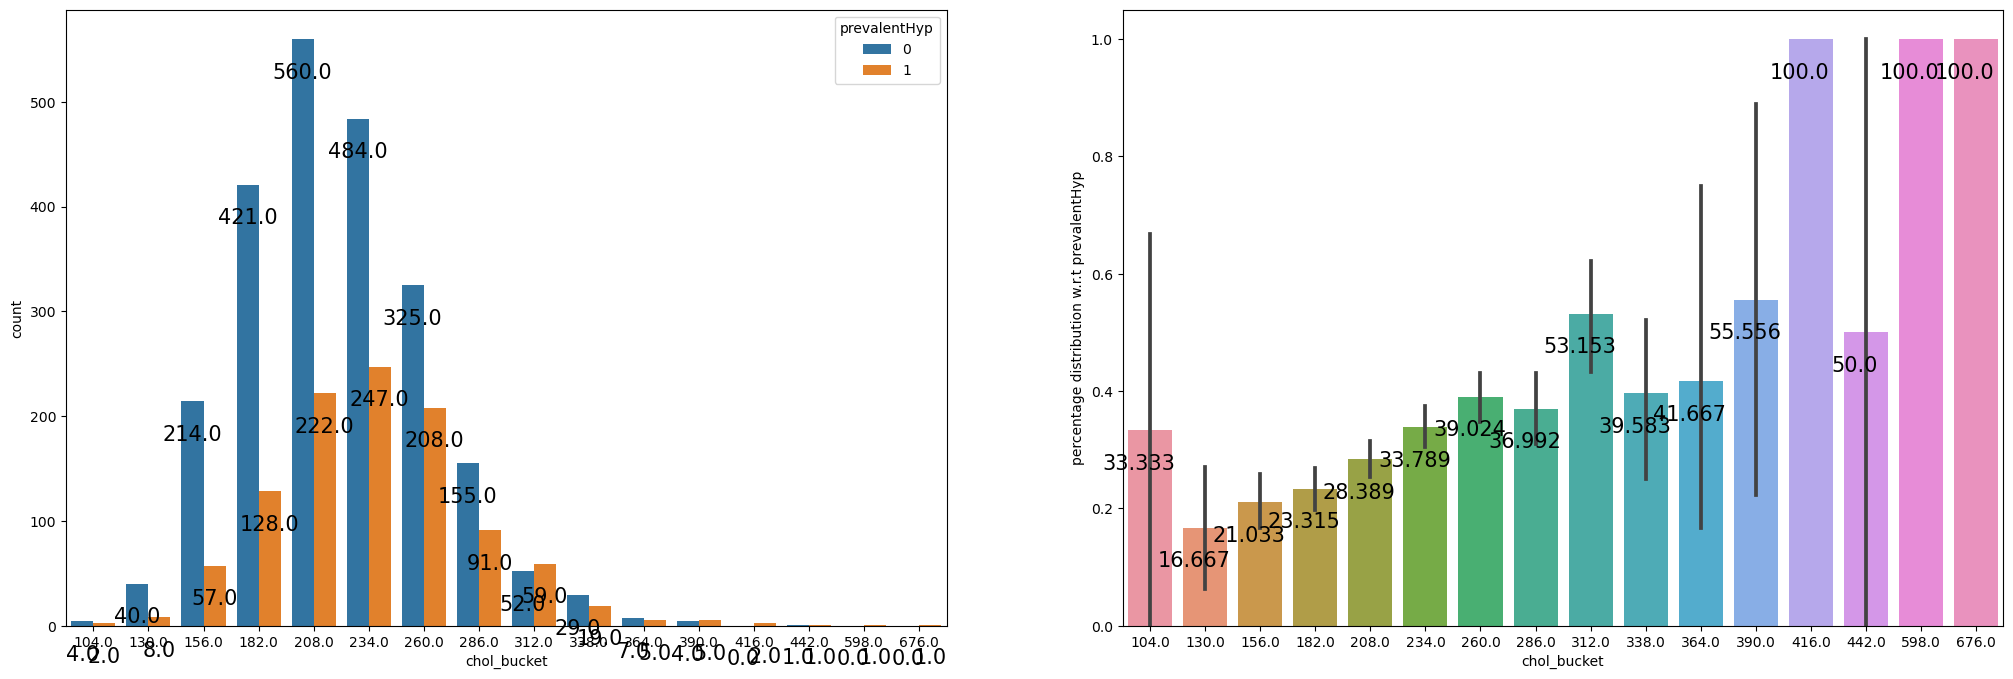

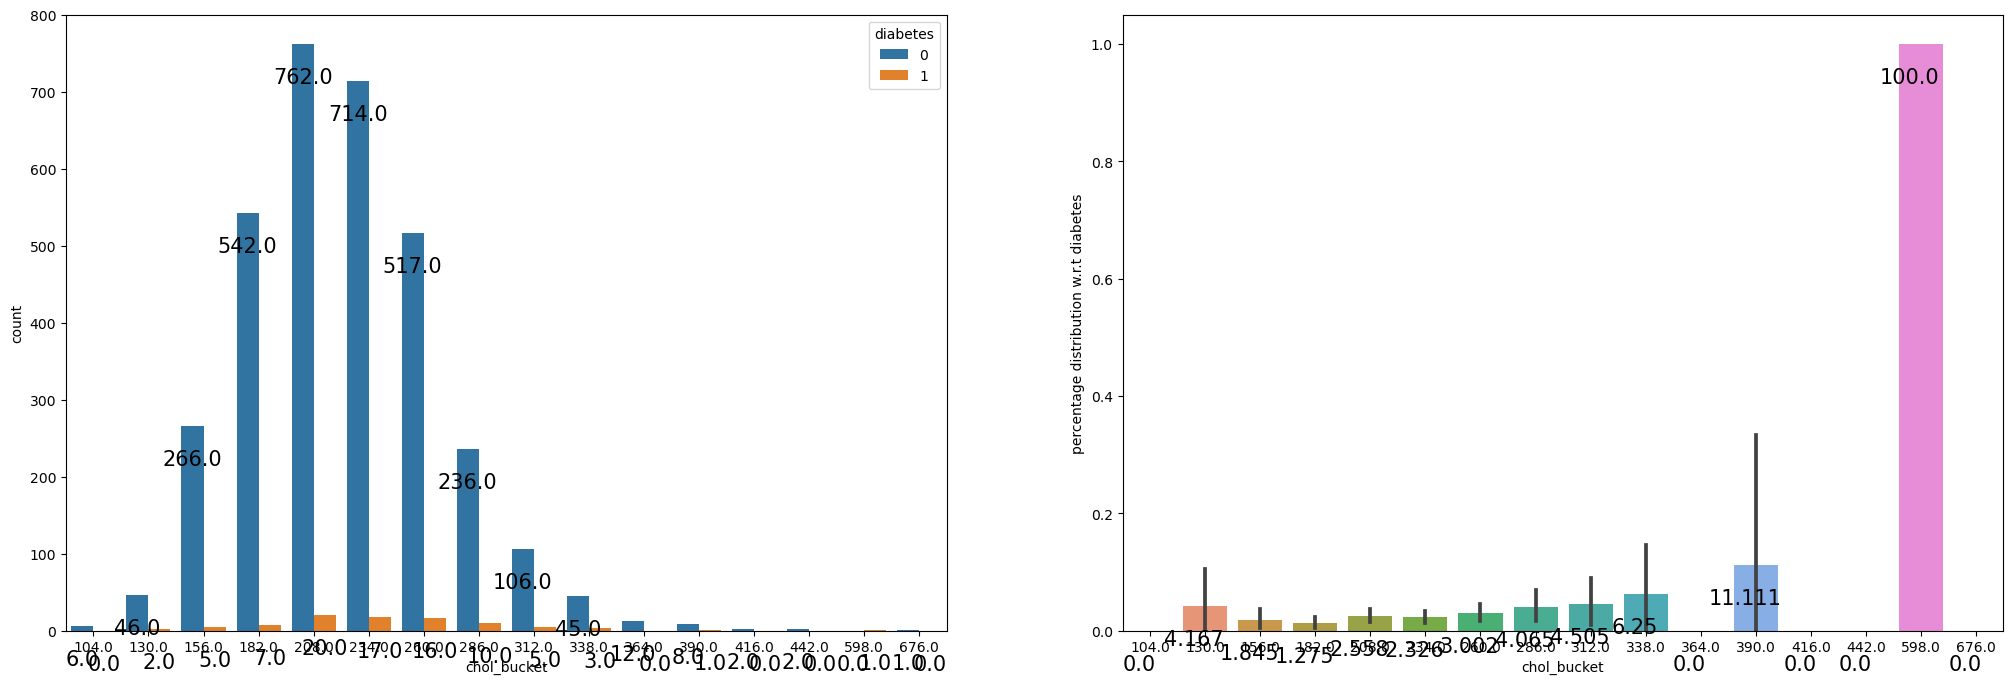

In [34]:
#For better further analysis binning is implemented on age feature
data_df['chol_bucket'] = data_df['totChol'].apply(lambda x : 26*(x//26))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='chol_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

  vh=sns.barplot(x ='chol_bucket',y =v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Females tend to have higher cholesterol levels compared to males.
*   Bp and hypertension issues tend to increase with an increase in cholesterol levels

### **Analysis with respect to cigsPerDay**

**Analysising cigsPerDay feature with respect to other categorical features :**

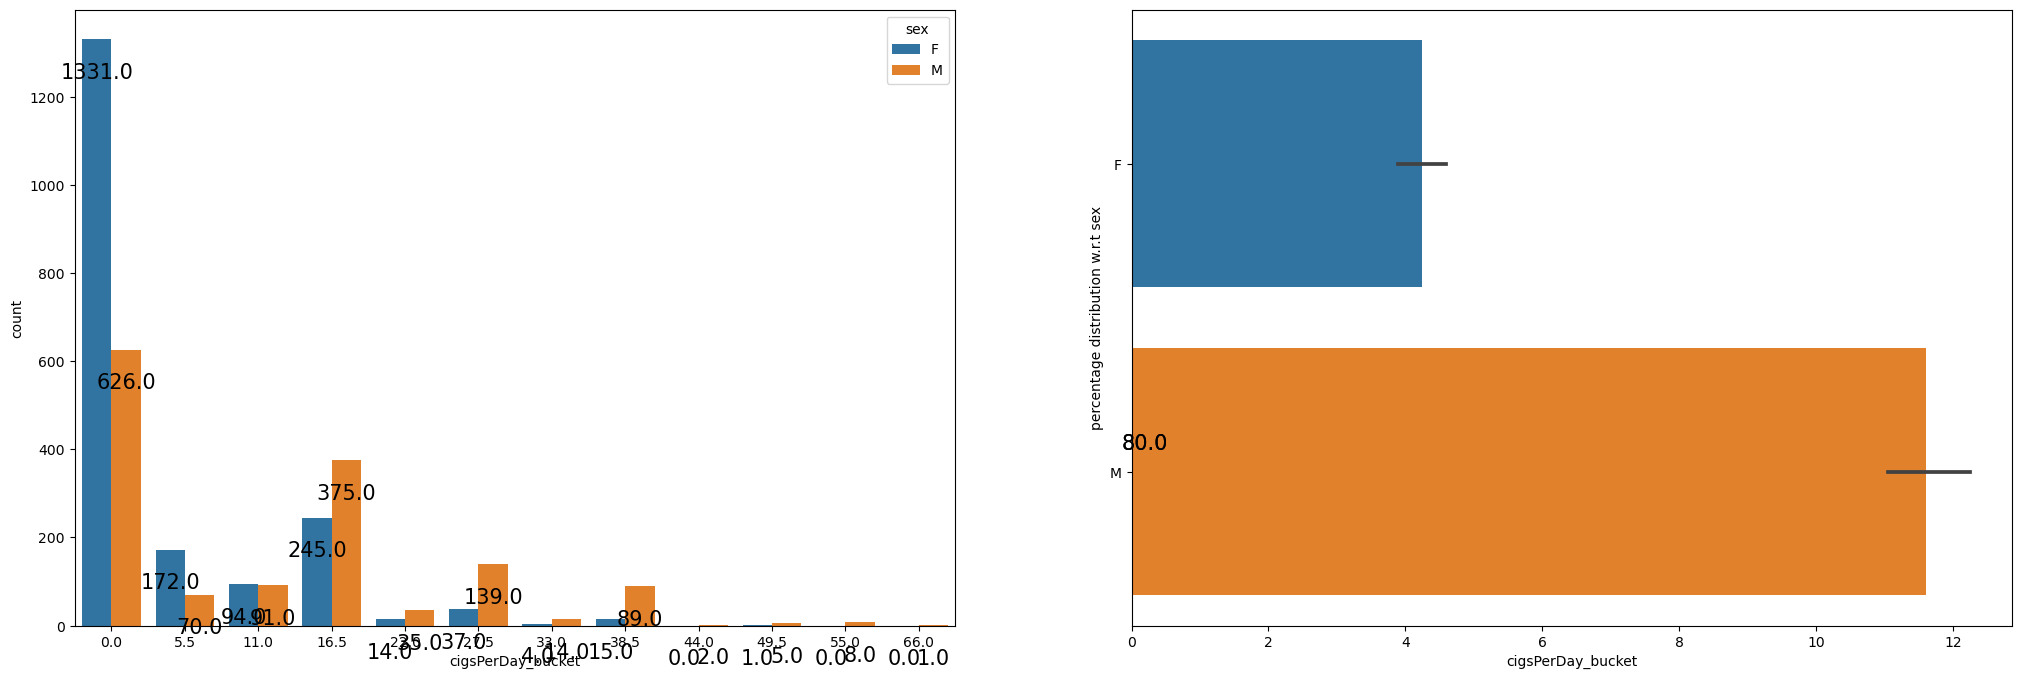

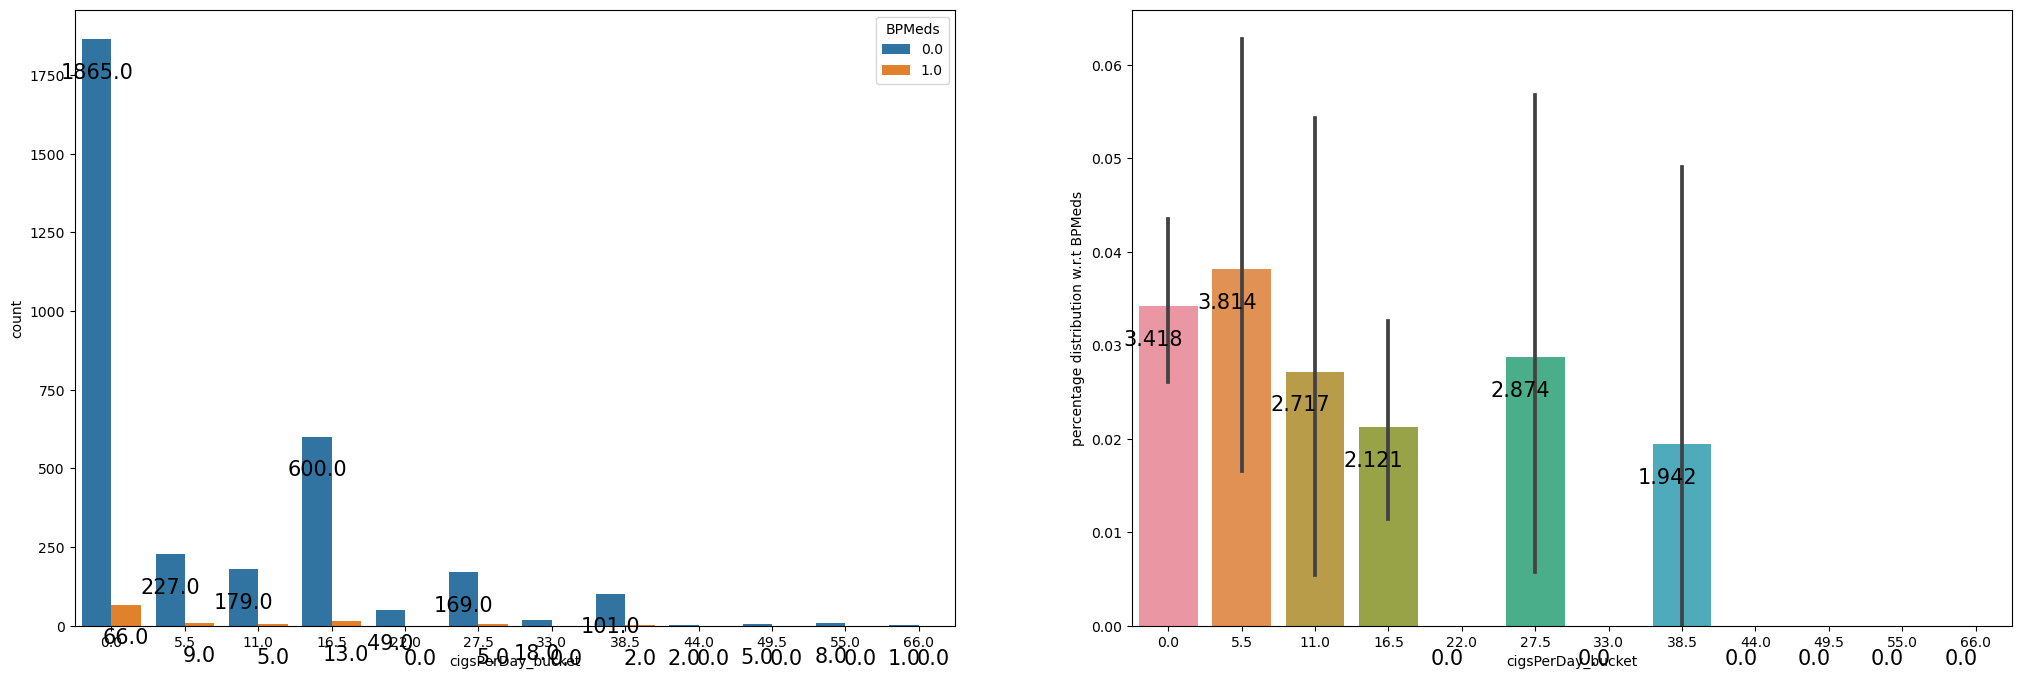

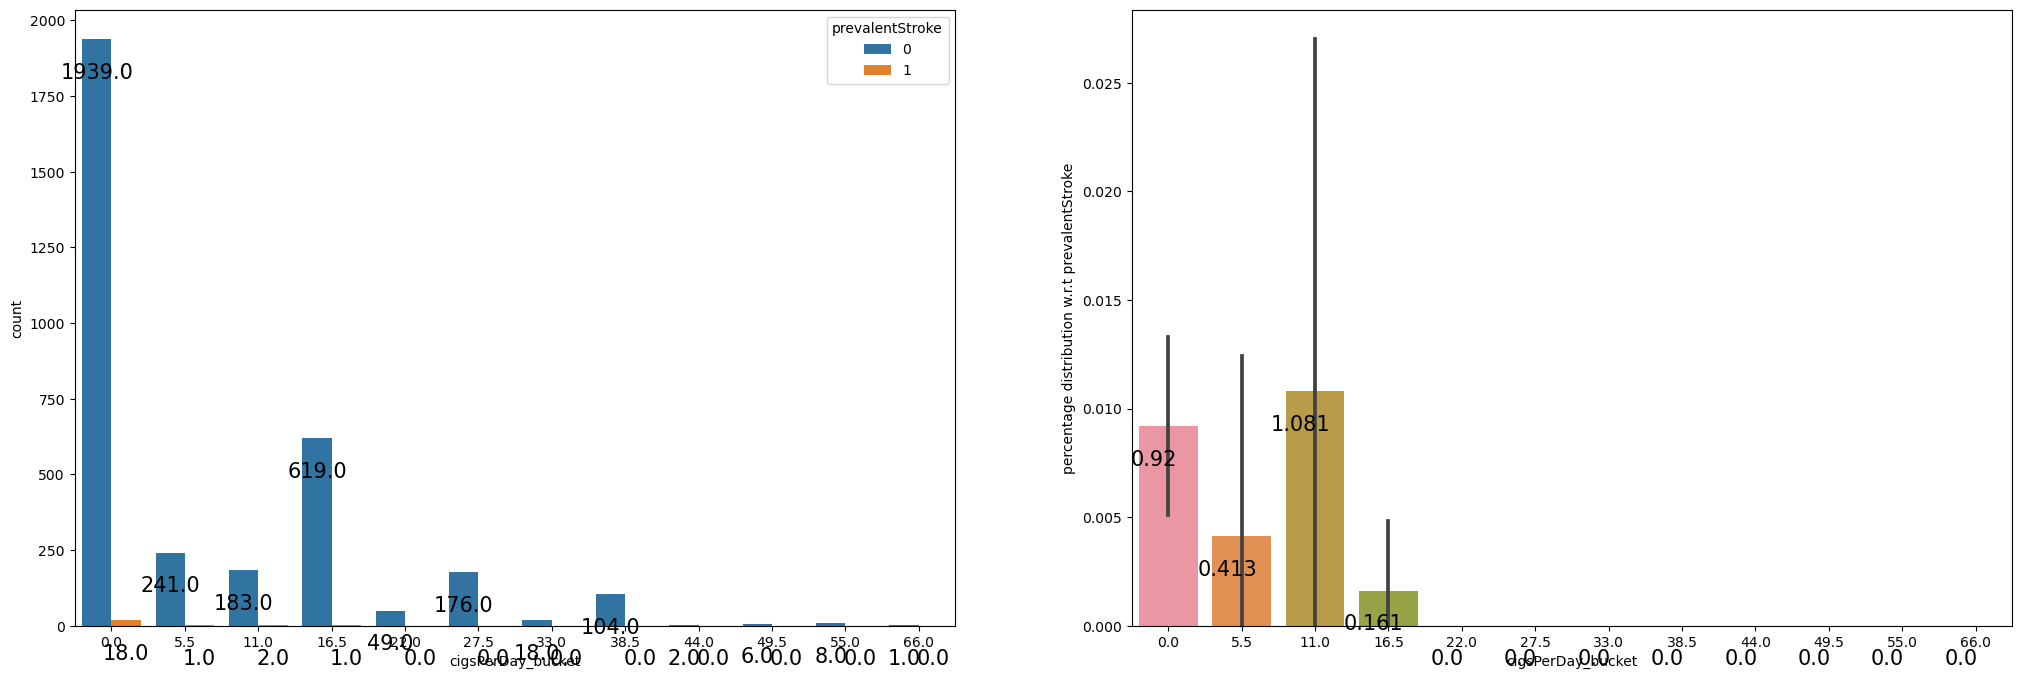

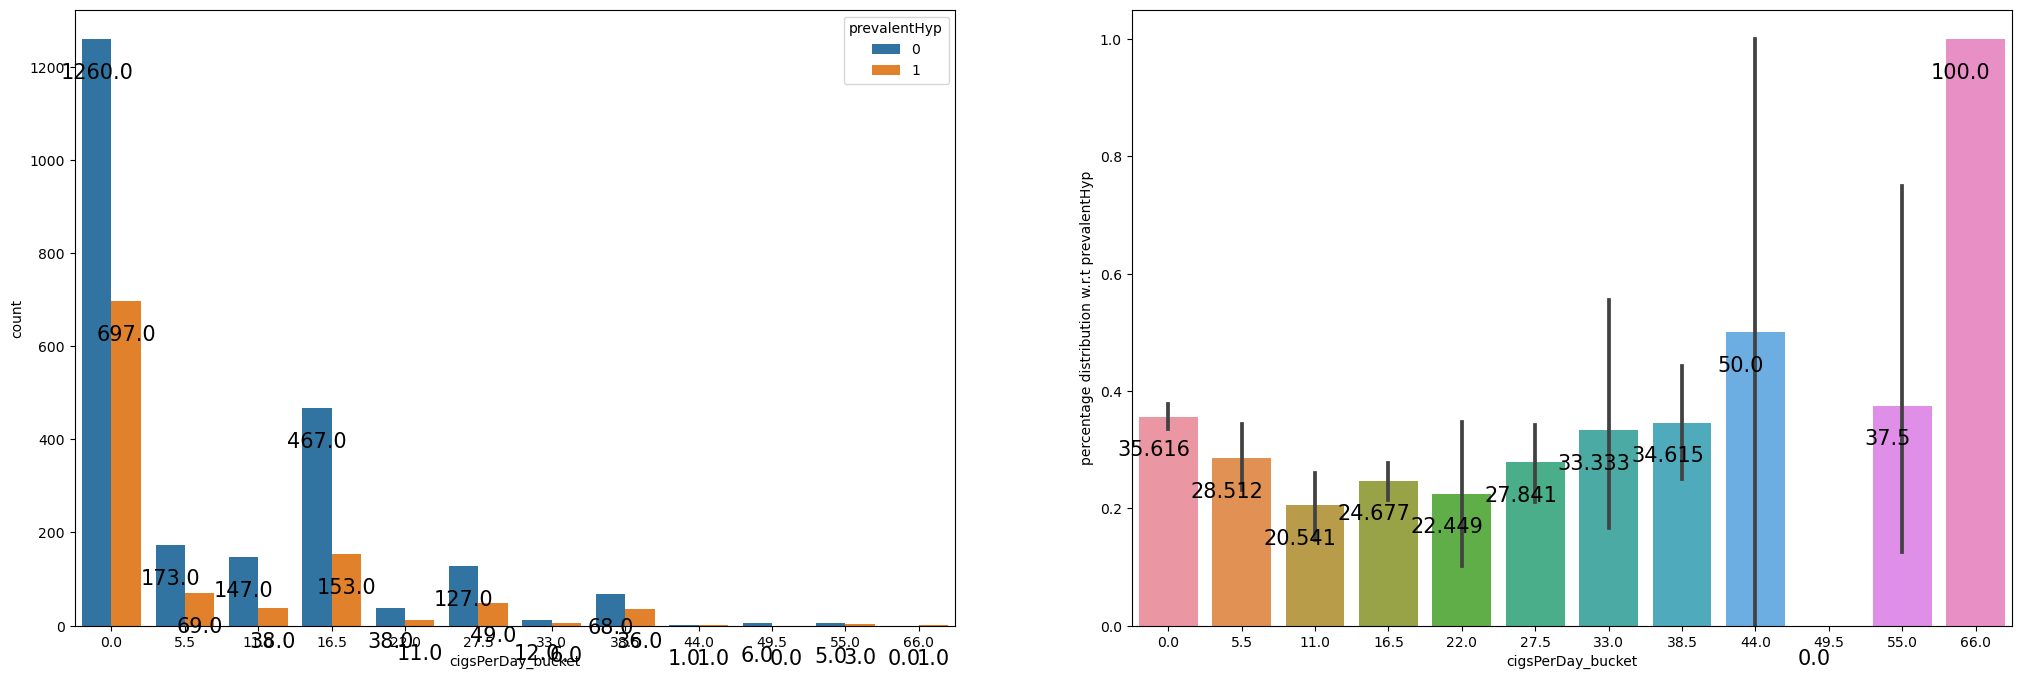

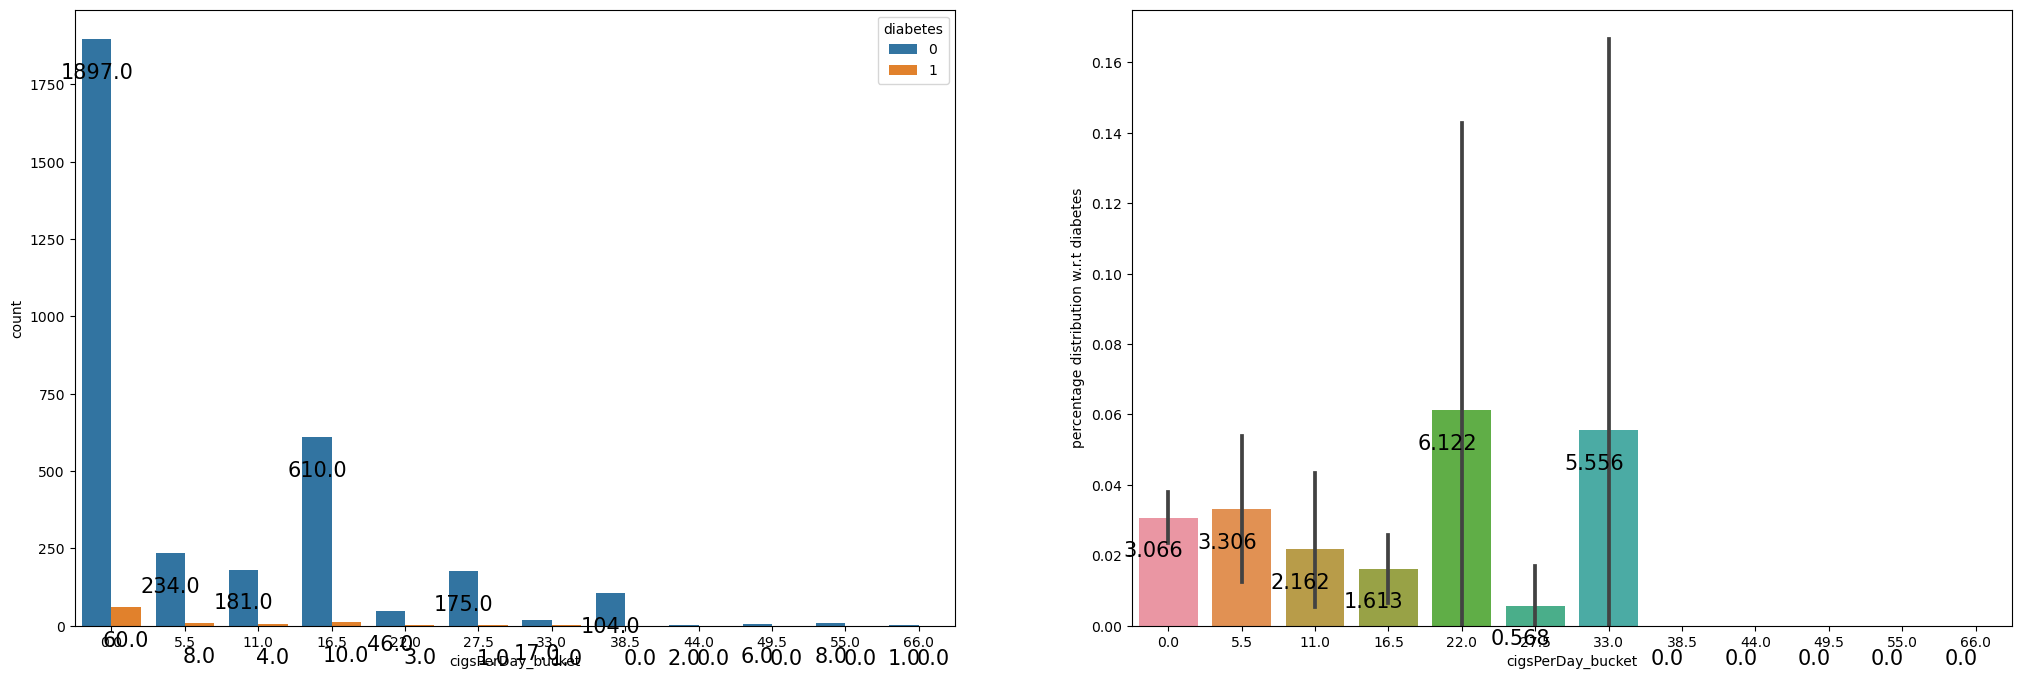

In [36]:
#For better further analysis binning is implemented on age feature
data_df['cigsPerDay_bucket'] = data_df['cigsPerDay'].apply(lambda x : 5.5*(x//5.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='cigsPerDay_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot(x='cigsPerDay_bucket',y=v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)